<a href="https://colab.research.google.com/github/boutebbakh/LearningByGame/blob/main/Dami_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***La lecture des données:***

In [ ]:
#Lire les Ds
import pandas as pd
data =pd.read_csv('cancer_poumon.csv',sep=';')
print(data.head());

          id_sample     APOC1     MERTK     CMTM3      XPR1     H2BC5  \
0  TCGA-43-6647-01A  3.692305  2.569732  4.155590  4.094676  2.792685   
1  TCGA-22-4593-01A  2.949213  1.027134  4.030874  2.677671  3.339568   
2  TCGA-92-7341-01A  5.400119  3.897991  3.961812  4.805674  3.608529   
3  TCGA-68-8251-01A  3.774515  2.150148  4.081626  3.183550  1.947876   
4  TCGA-85-8479-01A  2.022175  0.795053  2.062744  3.044048  5.256811   

      MSMO1    TMEM97     IFFO2    FAM89A  ...      MELK     MMP12      SOX9  \
0  4.901656  2.290414  4.404727  2.749062  ...  2.044266  7.120371  4.692437   
1  6.229210  5.446595  4.415215  2.714060  ...  3.737576  2.693306  5.017445   
2  6.396105  4.997865  3.701787  4.218262  ...  3.668505  6.228964  3.631651   
3  4.221295  4.161457  2.794275  3.145032  ...  3.278803  6.731229  4.789792   
4  4.986559  2.568166  4.760918  3.918480  ...  2.593756  1.851387  3.478012   

      APBA2      NFIB      GRK5  TMEM150B  tissue_status     source  class  
0  

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# ***Identification le nombre de lignes et de colonnes:***

In [ ]:
#nbr of columns and lines
nb_lines, nb_columns= data.shape
print("The number of lines is", nb_lines, "and the number of columns is", nb_columns)

The number of lines is 150 and the number of columns is 54


# ***Examination le type des données et la distribution des classes:***

In [ ]:

# types of Ds
print (data.dtypes)

print(data['class'].value_counts())

id_sample         object
APOC1            float64
MERTK            float64
CMTM3            float64
XPR1             float64
H2BC5            float64
MSMO1            float64
TMEM97           float64
IFFO2            float64
FAM89A           float64
CTSH             float64
DOK4             float64
ARFGEF3          float64
FOXA1            float64
NCF2             float64
SNORD62B         float64
PYGB             float64
H3P6             float64
DGUOK-AS1        float64
APOE             float64
IGLV7-46         float64
NES              float64
STOM             float64
ELN              float64
ERRFI1           float64
IL1RN            float64
FZD5             float64
LIMK2            float64
IER5             float64
RNU6-850P        float64
CTSW             float64
CHCHD2P9         float64
LGALS2           float64
RPS2P46          float64
KDM7A-DT         float64
FLVCR2           float64
PRC1             float64
FOXM1            float64
MICAL1           float64
MHENCR           float64


**Graphique en barres pour la distribution des classes**

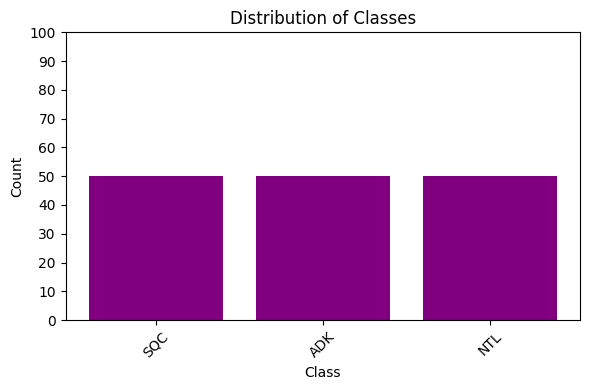

In [ ]:
#Distribution of classes visualization
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='purple')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.yticks(range(0, 101, 10))
plt.tight_layout()
plt.show()

# ***Affichage les boxplots des valeurs d’expression des gènes du dataset:***

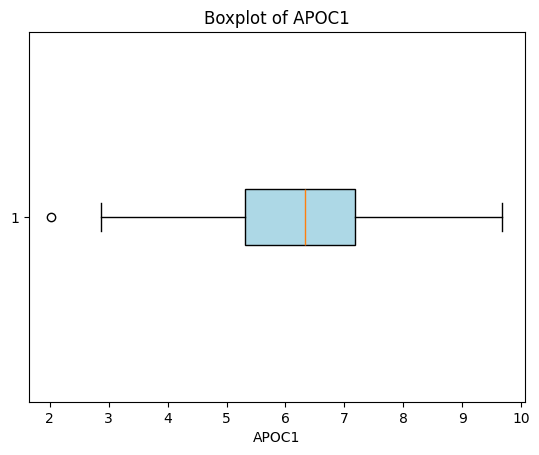

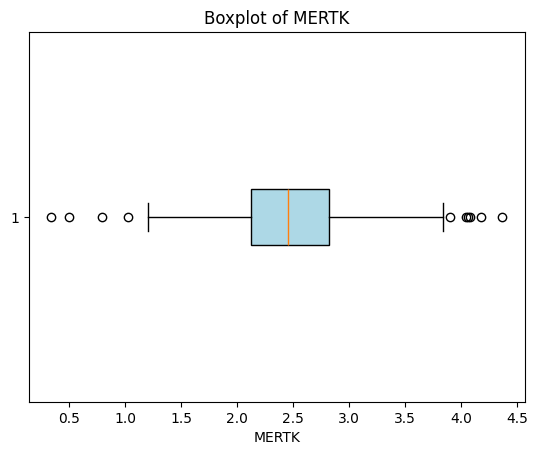

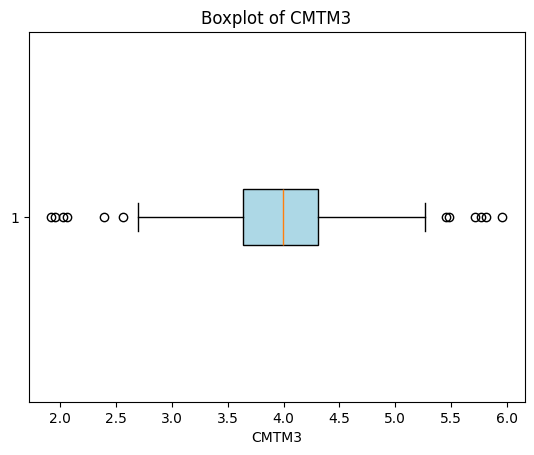

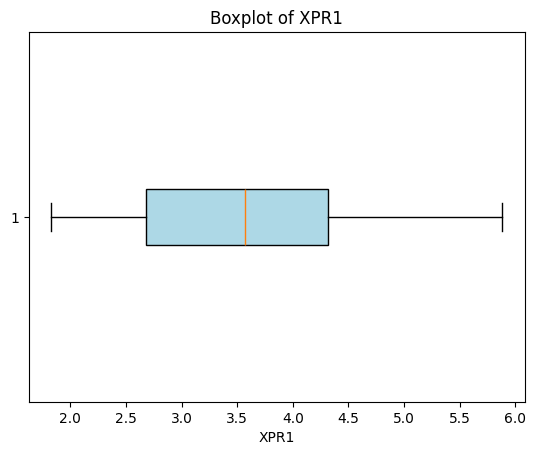

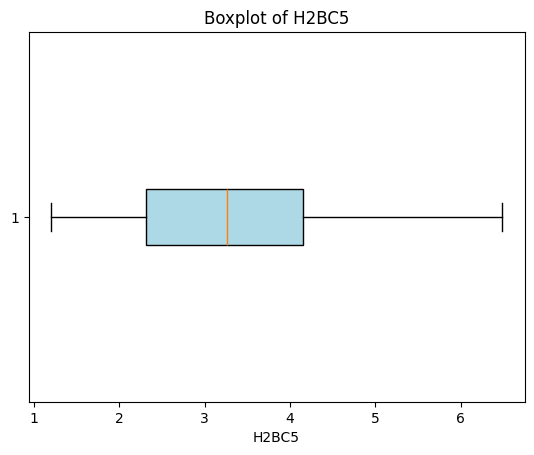

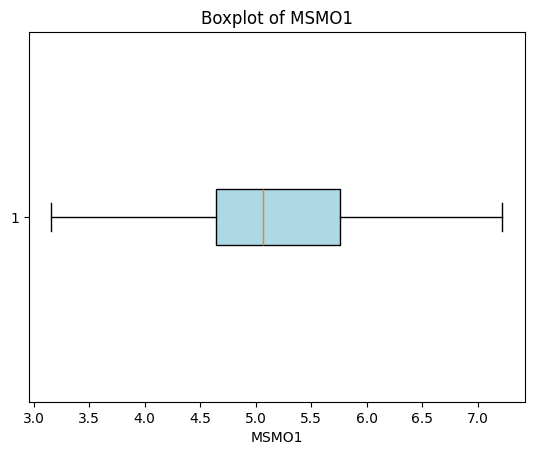

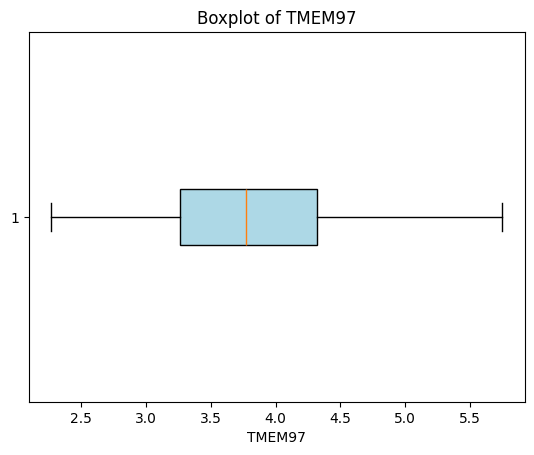

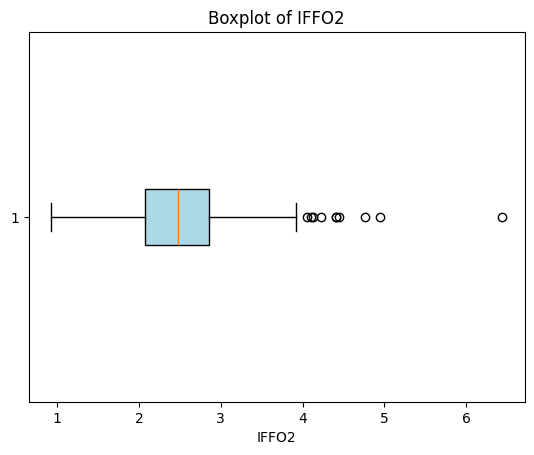

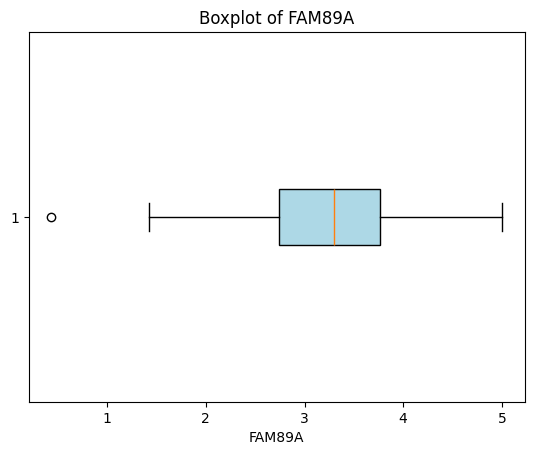

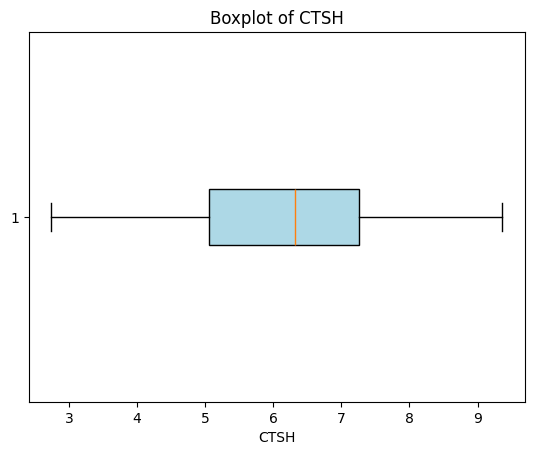

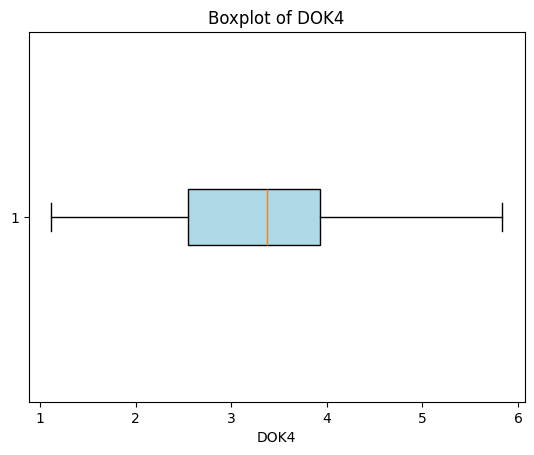

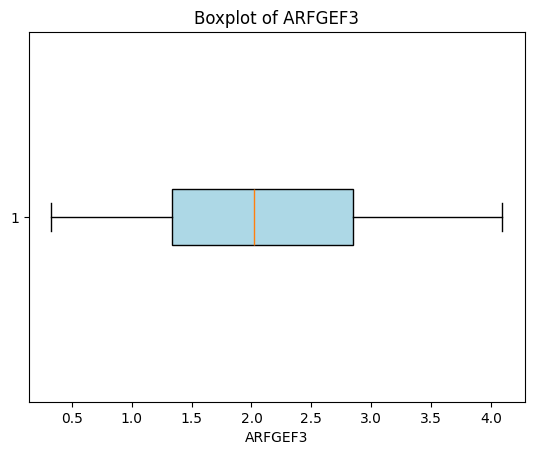

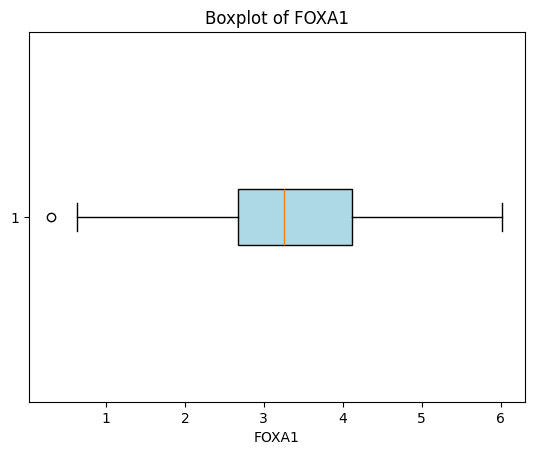

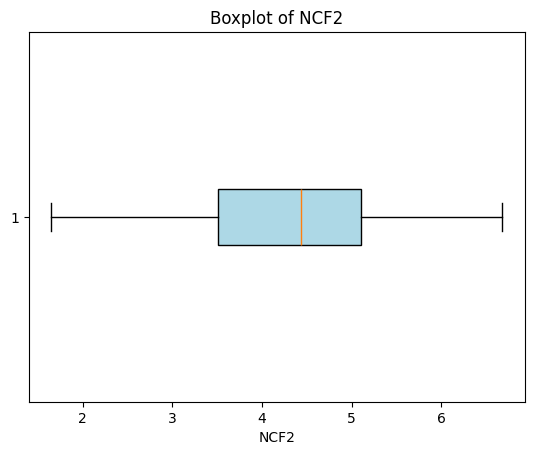

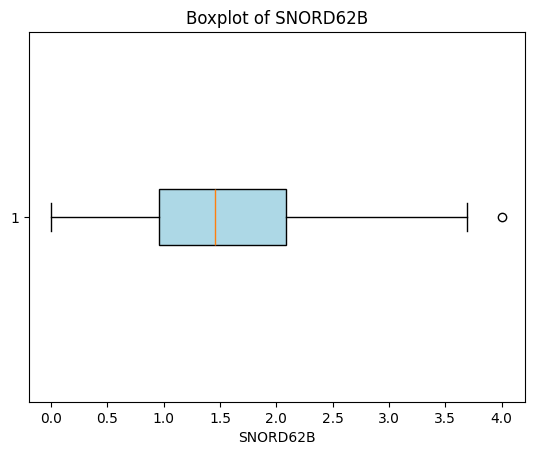

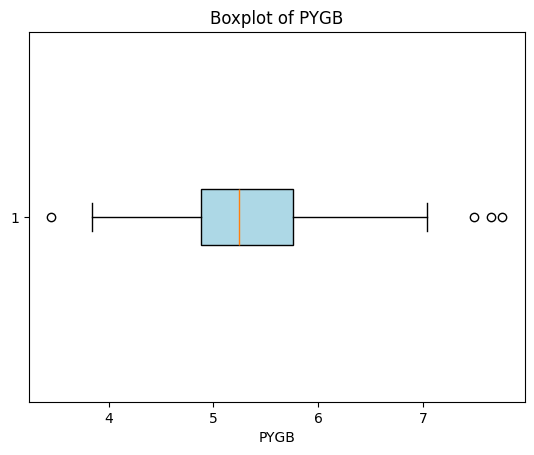

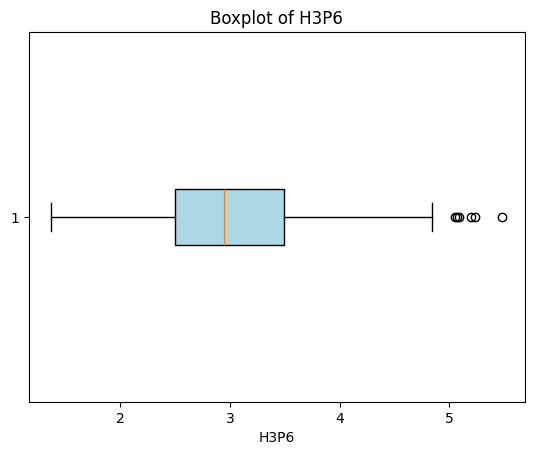

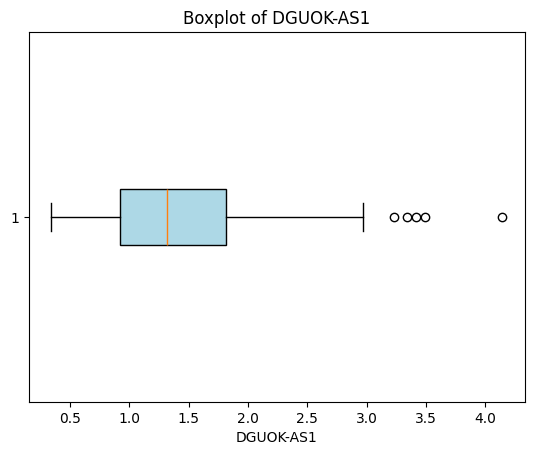

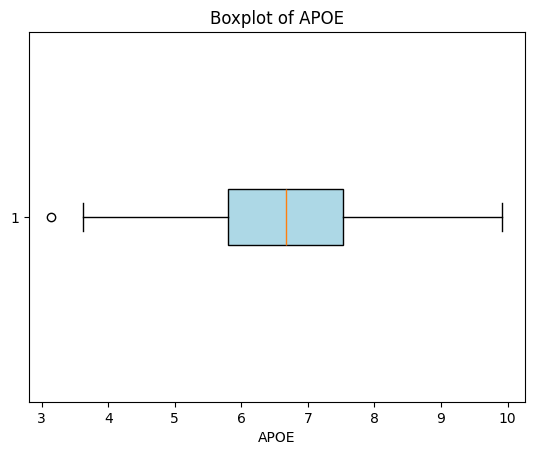

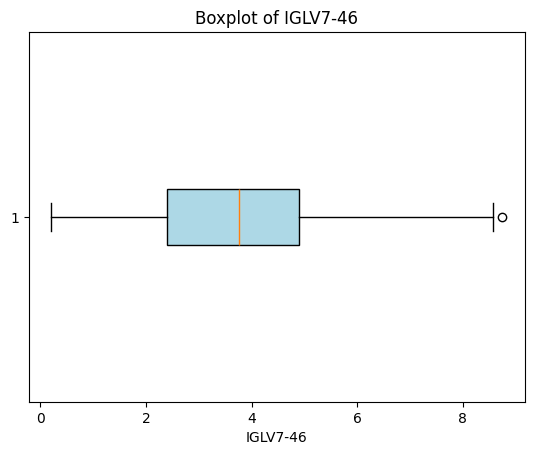

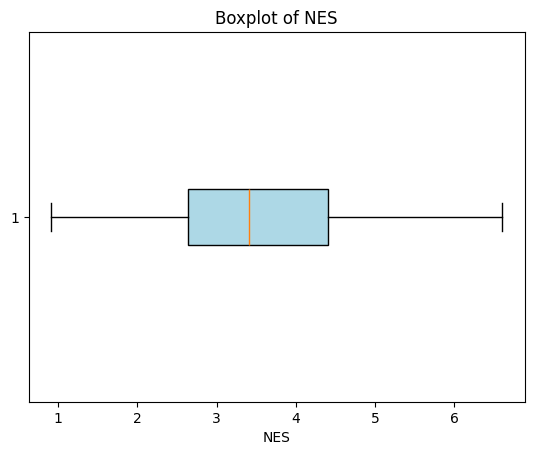

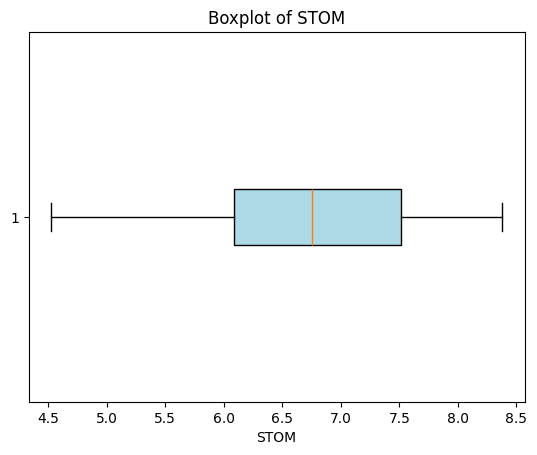

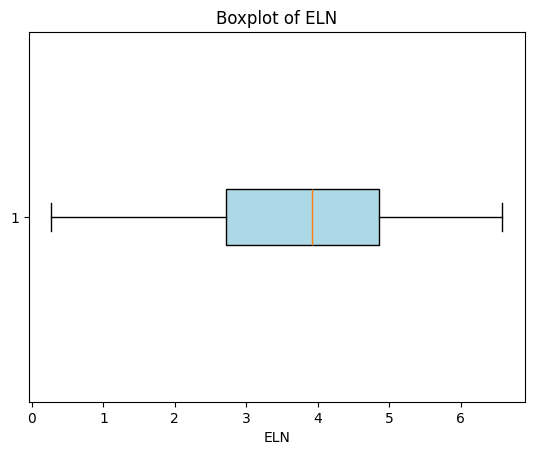

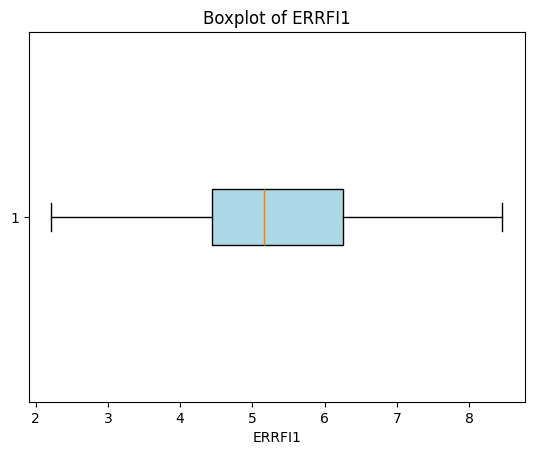

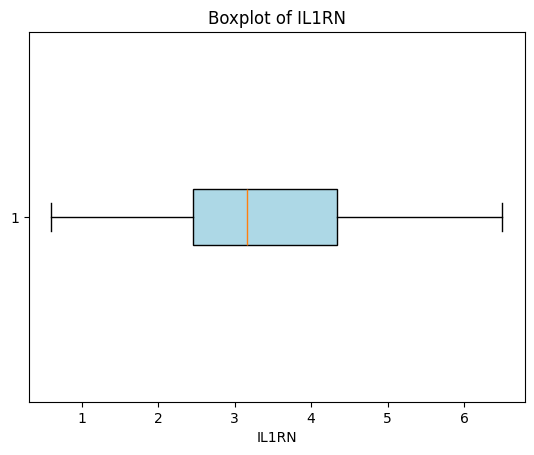

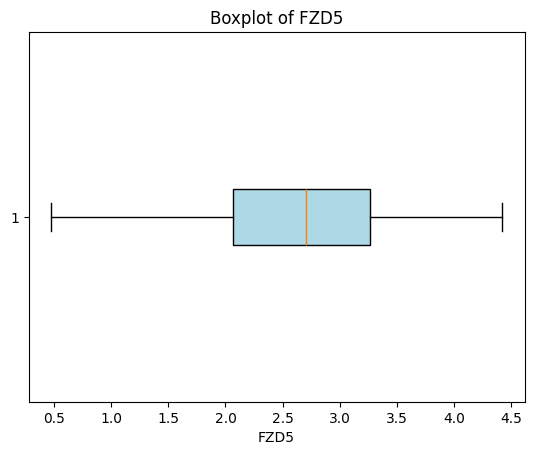

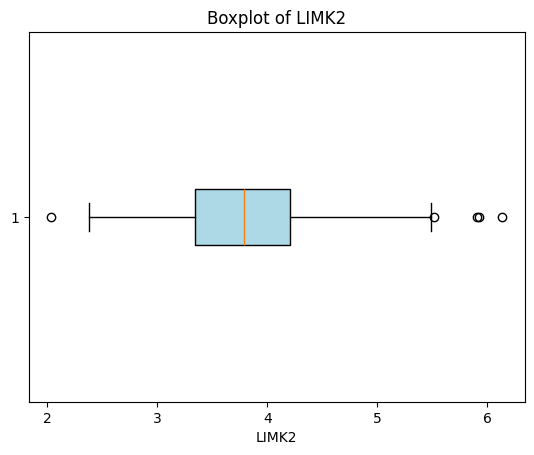

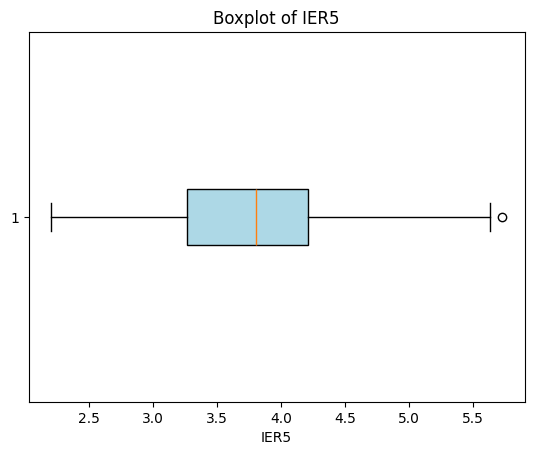

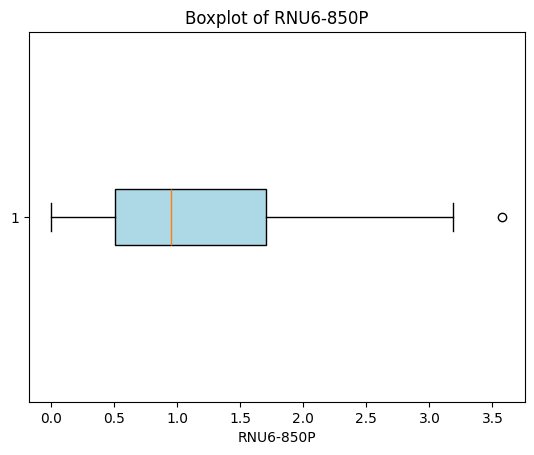

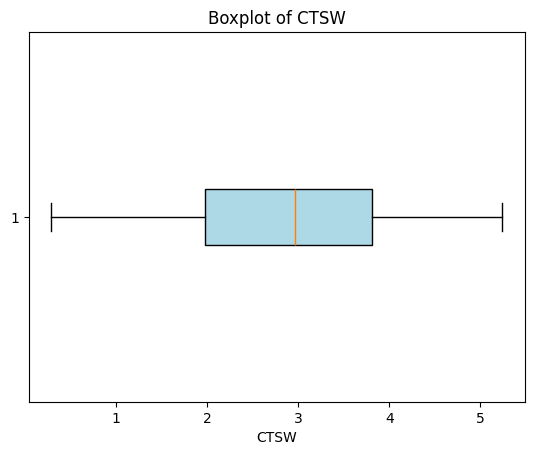

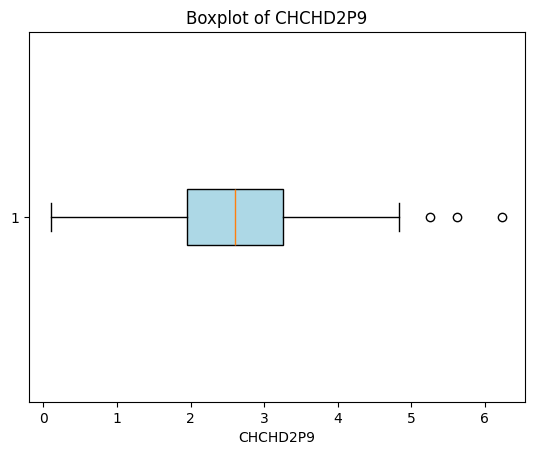

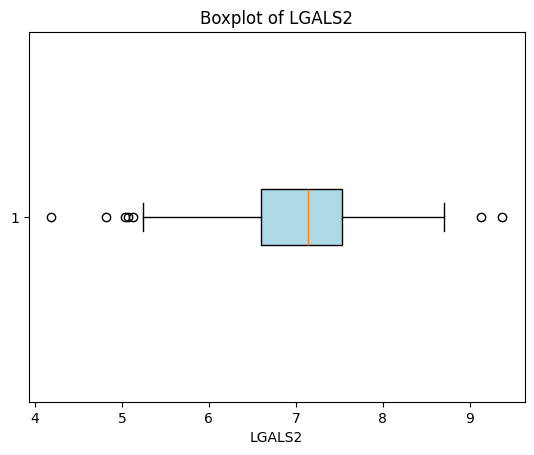

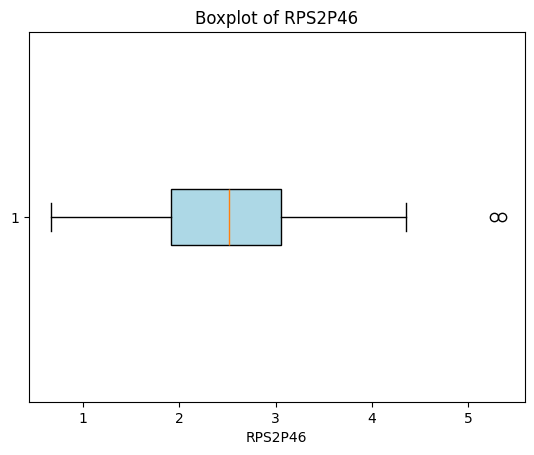

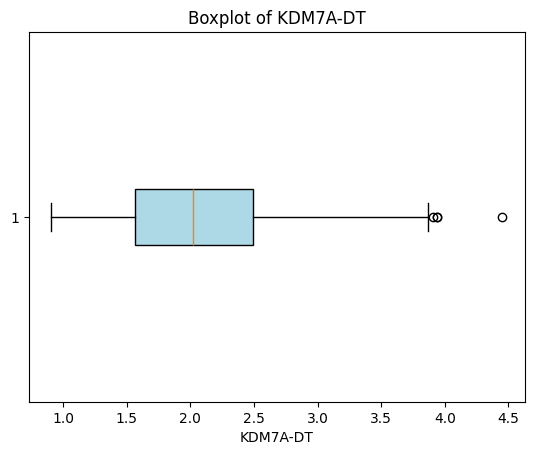

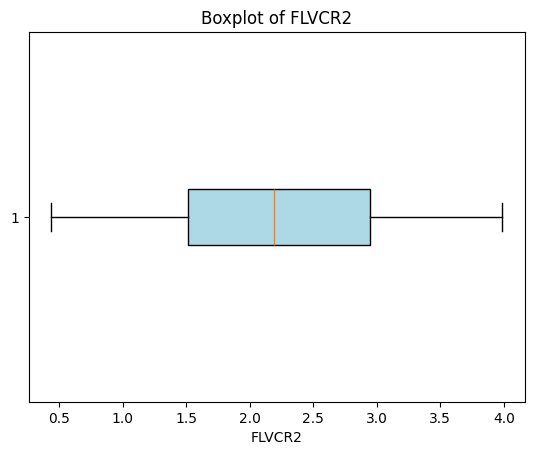

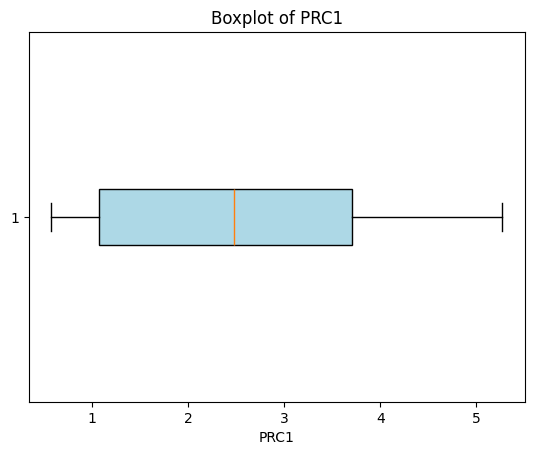

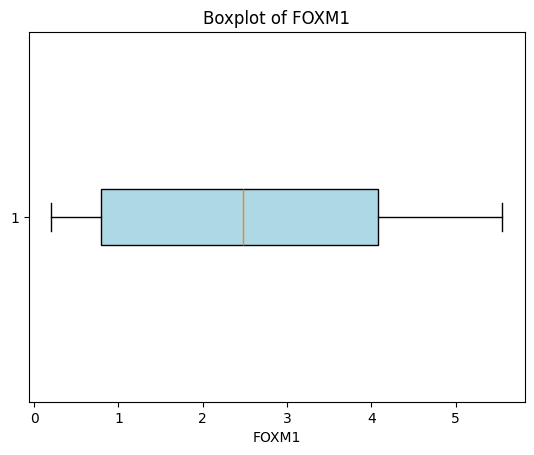

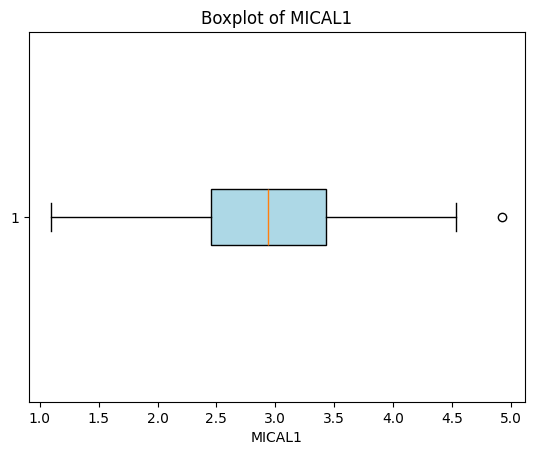

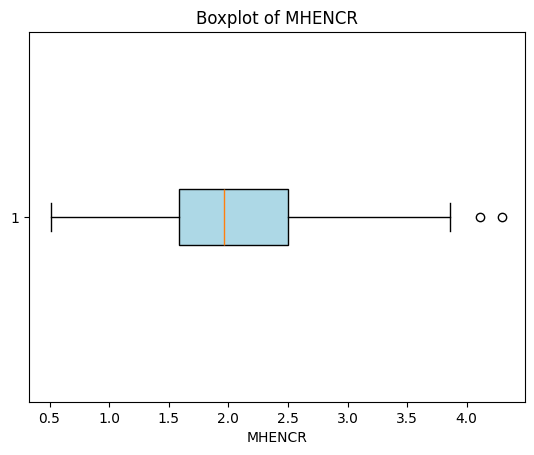

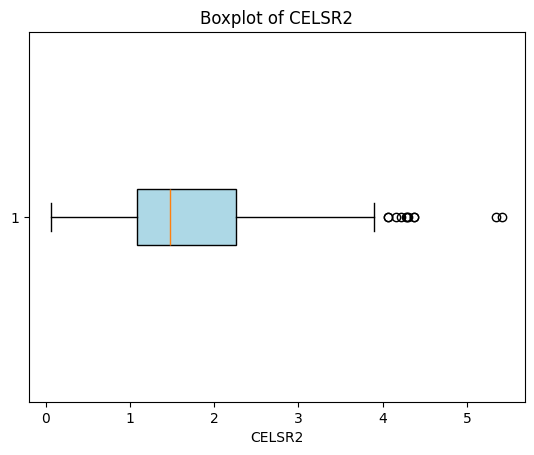

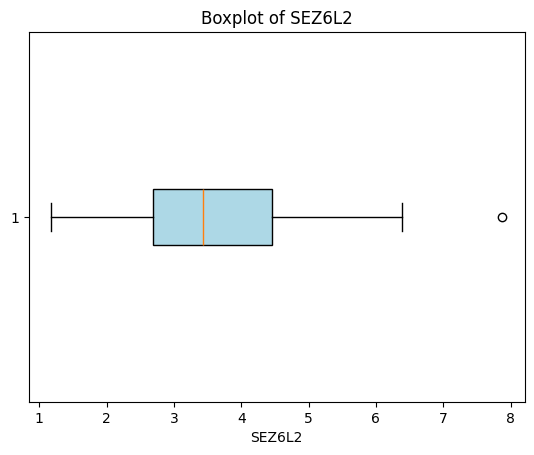

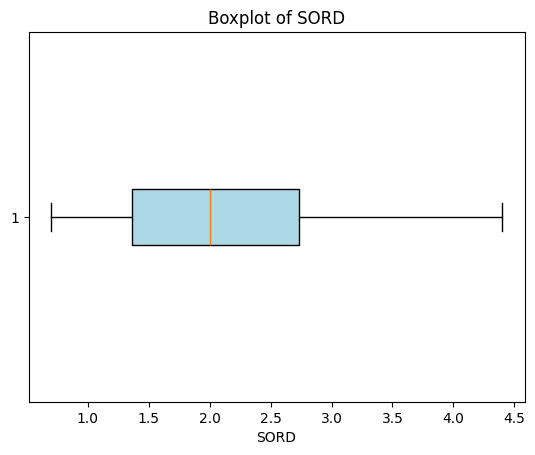

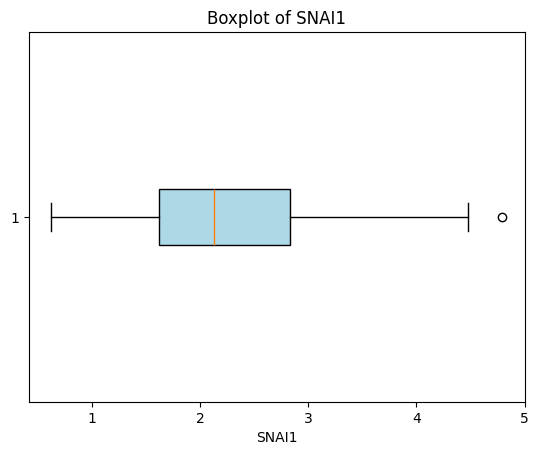

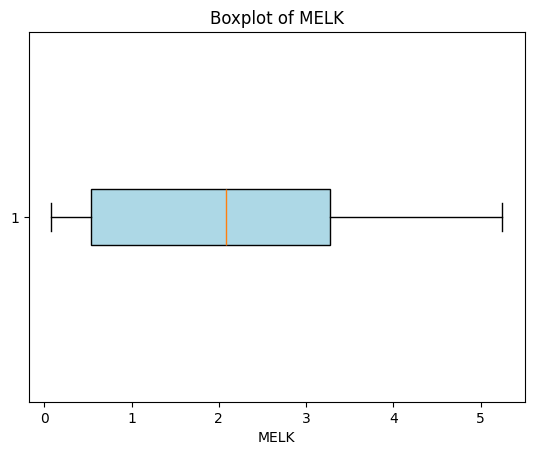

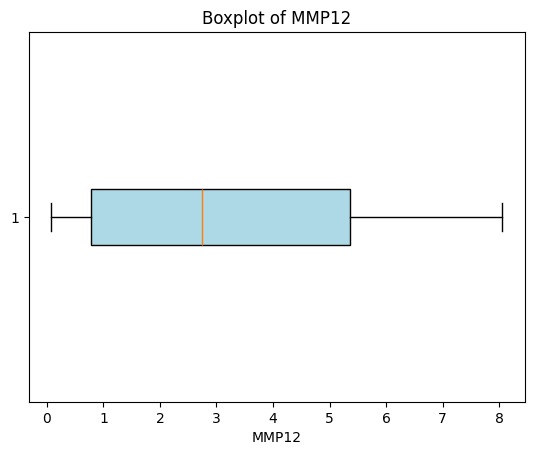

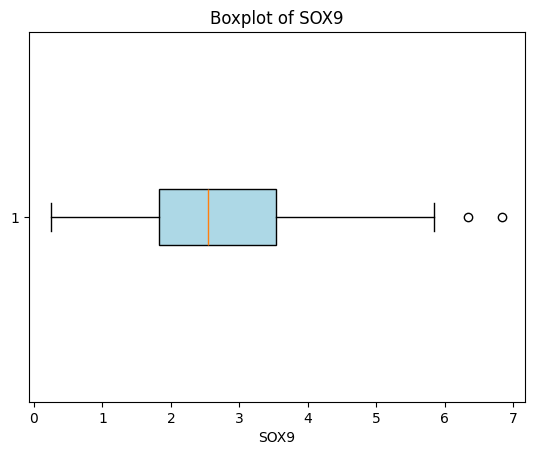

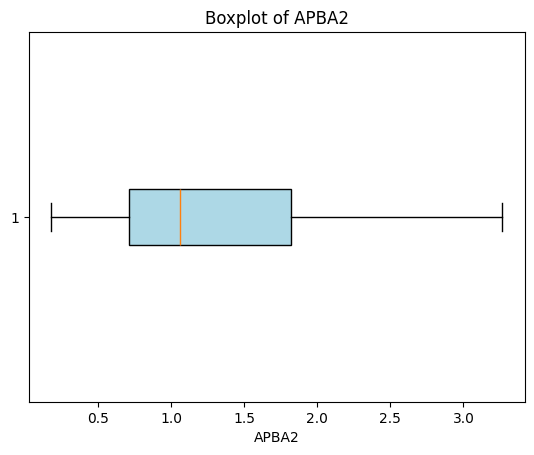

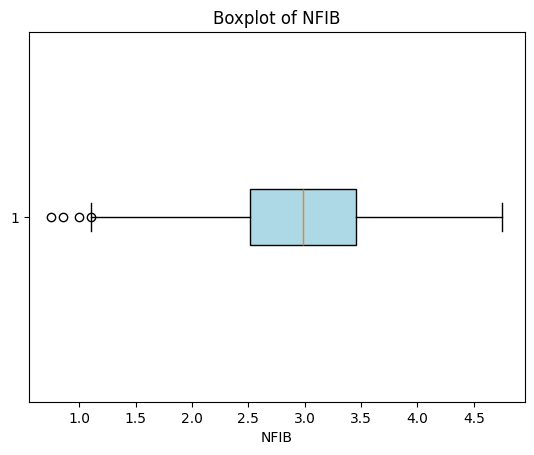

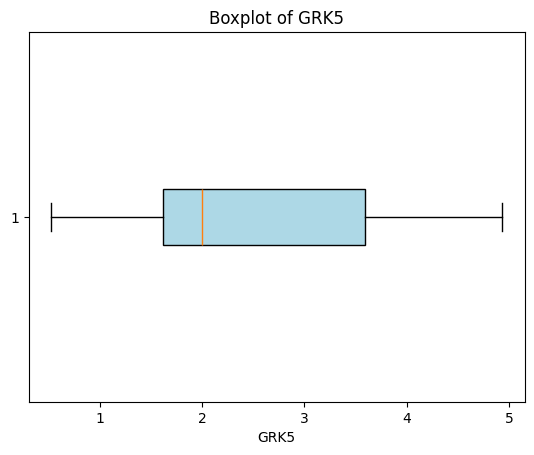

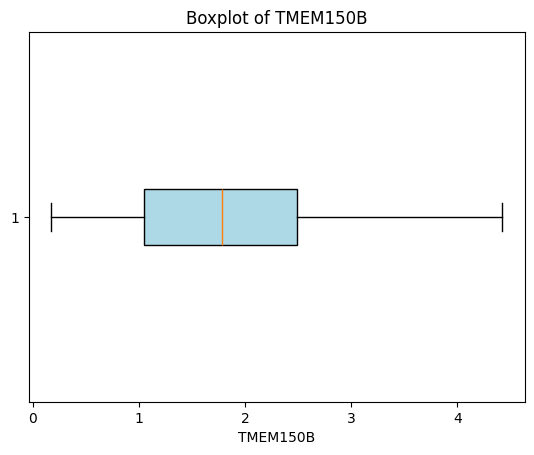

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Tracer un boxplot pour chaque colonne numérique
for column in data.select_dtypes(include=[np.number]).columns:
    plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()


# ***Prétraitement et nettoyage des données :***

# **Traitement de données manquantes:**

In [ ]:

print (data.isna()) # verifier l'exixtence des valeurs manquantes
print(data.isna().sum()) #calcule la somme de tous


     id_sample  APOC1  MERTK  CMTM3   XPR1  H2BC5  MSMO1  TMEM97  IFFO2  \
0        False  False  False  False  False  False  False   False  False   
1        False  False  False  False  False  False  False   False  False   
2        False  False  False  False  False  False  False   False  False   
3        False  False  False  False  False  False  False   False  False   
4        False  False  False  False  False  False  False   False  False   
..         ...    ...    ...    ...    ...    ...    ...     ...    ...   
145      False  False  False  False  False  False  False   False  False   
146      False  False  False  False  False  False  False   False  False   
147      False  False  False  False  False  False  False   False  False   
148      False  False  False  False  False  False  False   False  False   
149      False  False  False  False  False  False  False   False  False   

     FAM89A  ...   MELK  MMP12   SOX9  APBA2   NFIB   GRK5  TMEM150B  \
0     False  ...  False  Fa

# ***Traitement des outliers:***

In [ ]:


data_original=data.copy()

for column in data.select_dtypes(include=[np.number]).columns:
    # Calculer Q1, Q3 et IQR pour la colonne
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Colonne: {column} - Nombre d'outliers before : {outliers.shape[0]}")#before the median
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound),
                            median, data[column])

Colonne: APOC1 - Nombre d'outliers before : 1
Colonne: MERTK - Nombre d'outliers before : 10
Colonne: CMTM3 - Nombre d'outliers before : 12
Colonne: XPR1 - Nombre d'outliers before : 0
Colonne: H2BC5 - Nombre d'outliers before : 0
Colonne: MSMO1 - Nombre d'outliers before : 0
Colonne: TMEM97 - Nombre d'outliers before : 0
Colonne: IFFO2 - Nombre d'outliers before : 10
Colonne: FAM89A - Nombre d'outliers before : 1
Colonne: CTSH - Nombre d'outliers before : 0
Colonne: DOK4 - Nombre d'outliers before : 0
Colonne: ARFGEF3 - Nombre d'outliers before : 0
Colonne: FOXA1 - Nombre d'outliers before : 1
Colonne: NCF2 - Nombre d'outliers before : 0
Colonne: SNORD62B - Nombre d'outliers before : 1
Colonne: PYGB - Nombre d'outliers before : 4
Colonne: H3P6 - Nombre d'outliers before : 6
Colonne: DGUOK-AS1 - Nombre d'outliers before : 5
Colonne: APOE - Nombre d'outliers before : 1
Colonne: IGLV7-46 - Nombre d'outliers before : 1
Colonne: NES - Nombre d'outliers before : 0
Colonne: STOM - Nombre d'o

# ***Affichage les boxplots apres le traiment des valeurs aberrantes***

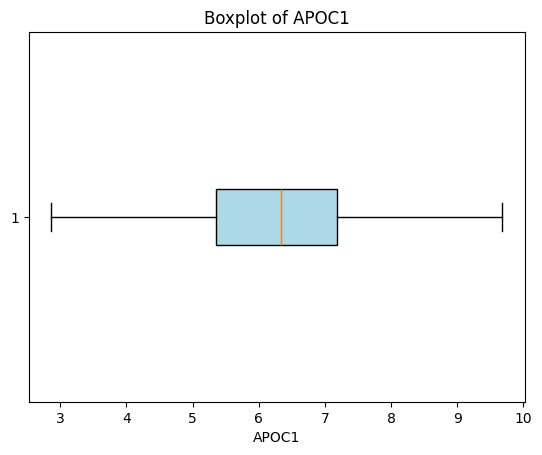

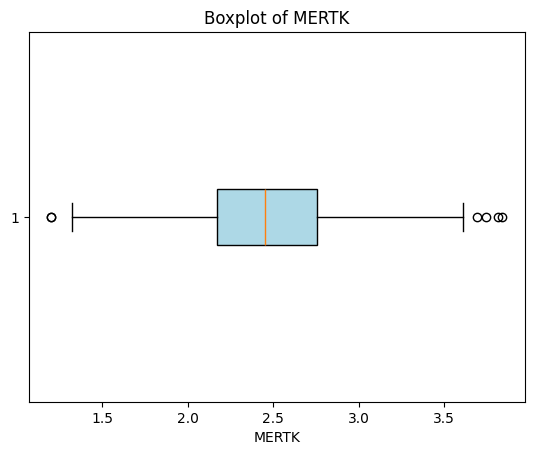

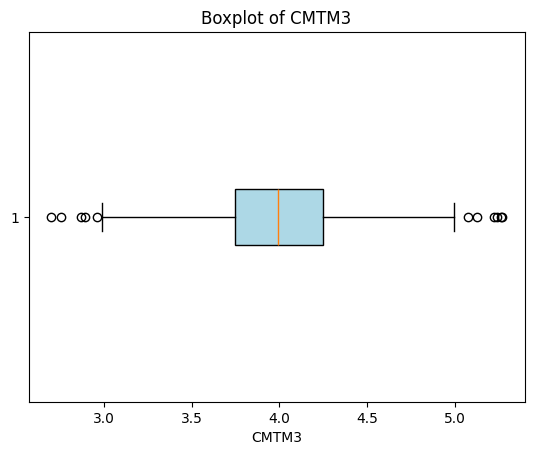

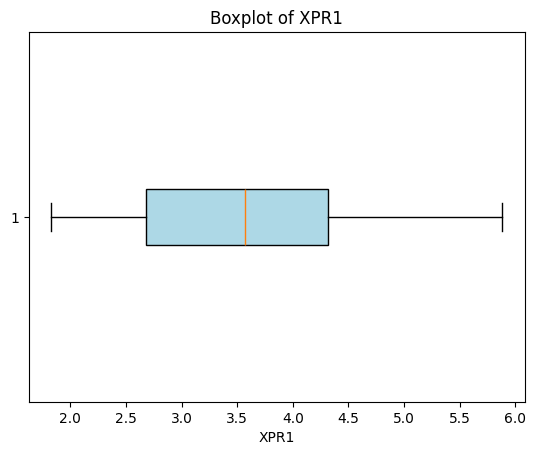

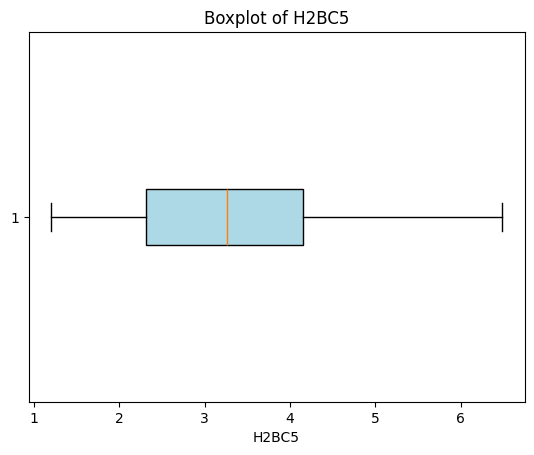

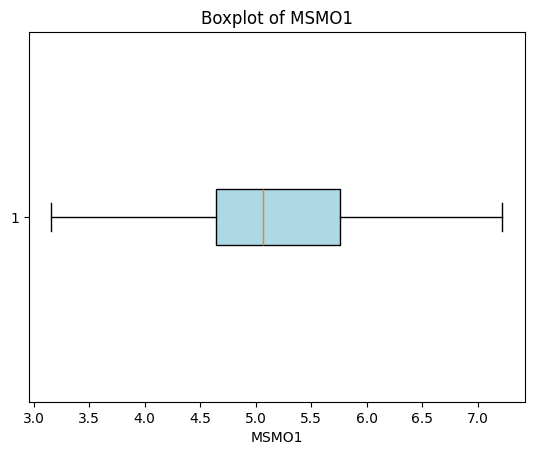

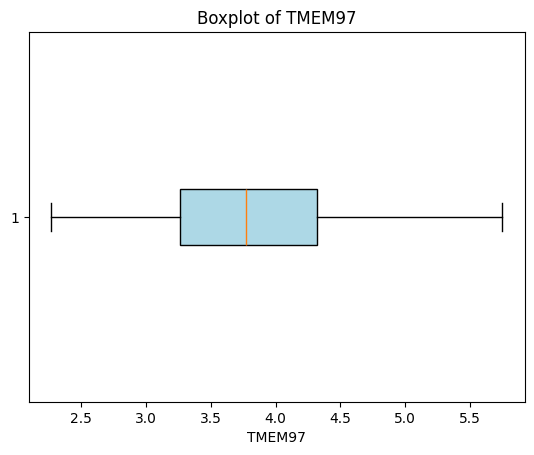

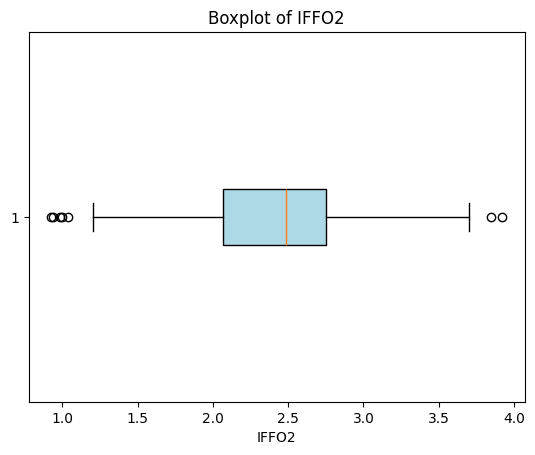

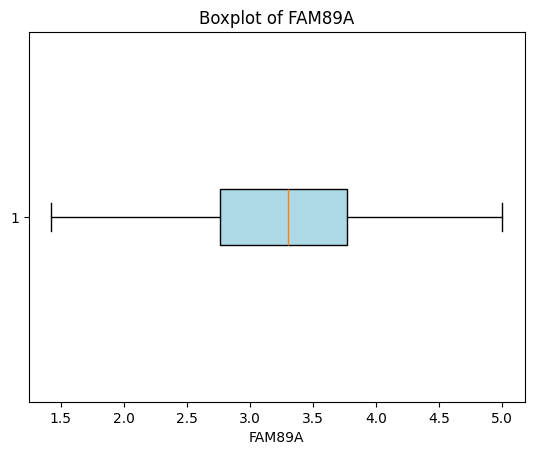

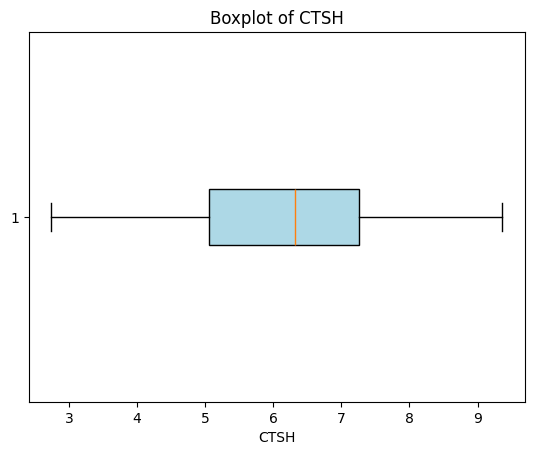

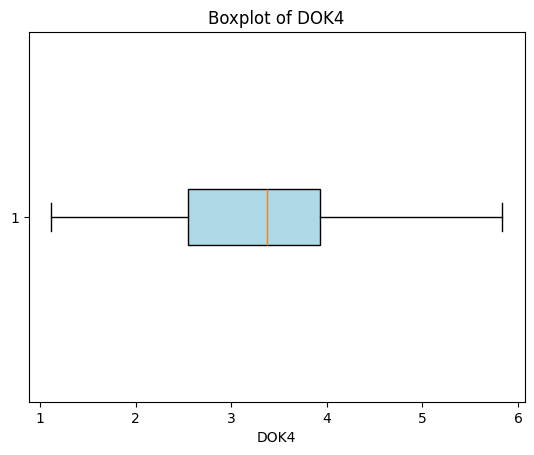

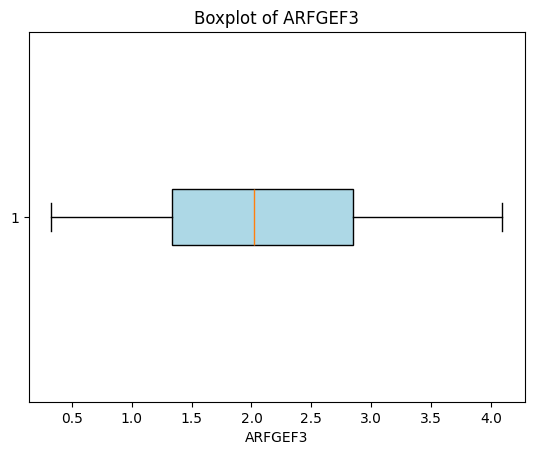

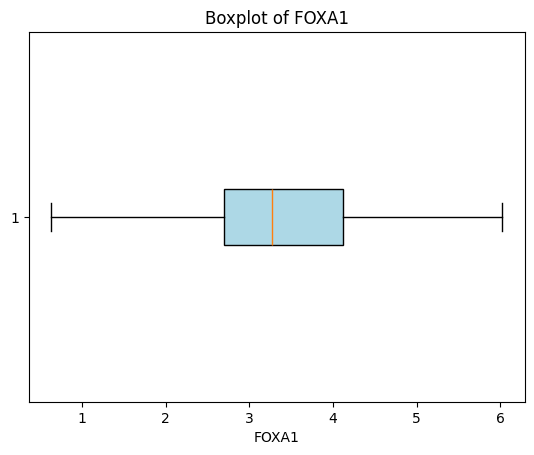

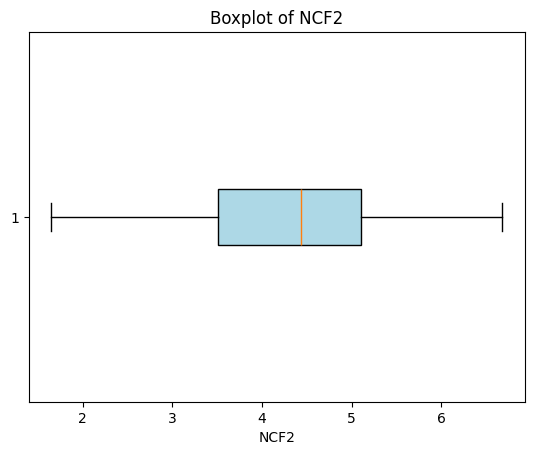

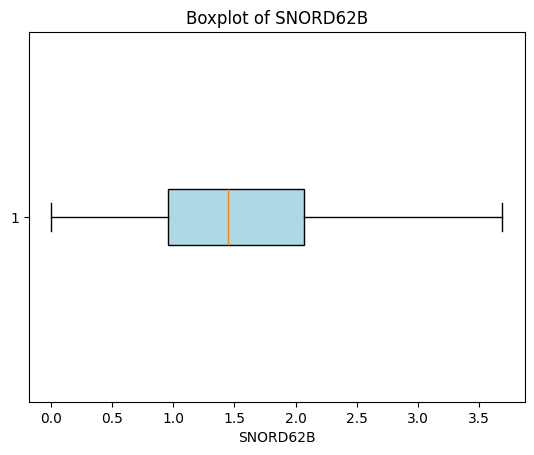

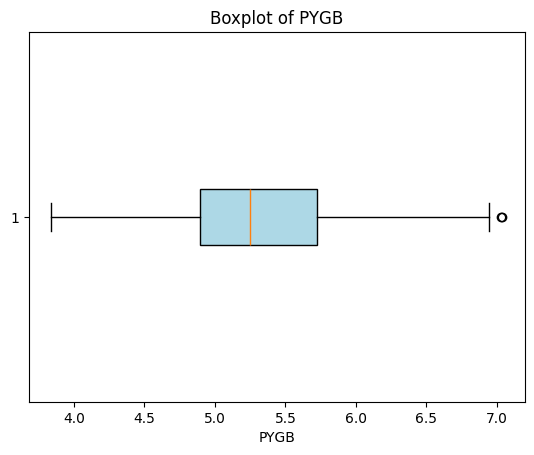

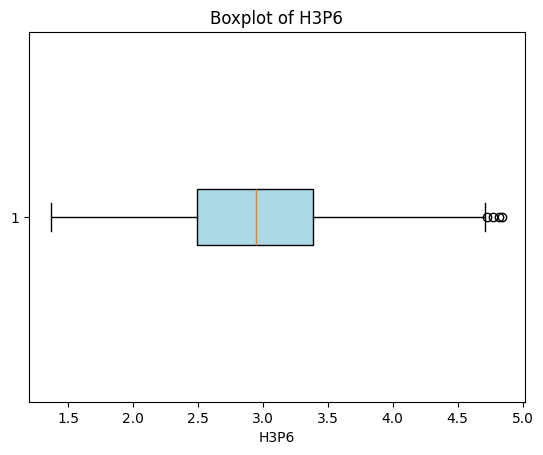

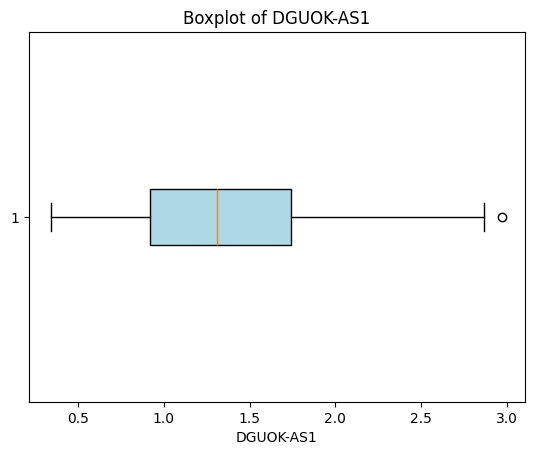

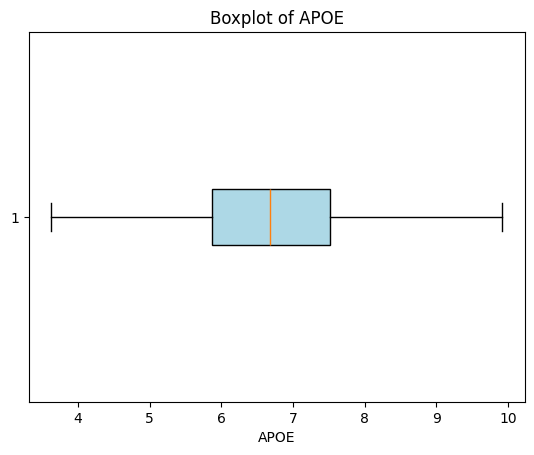

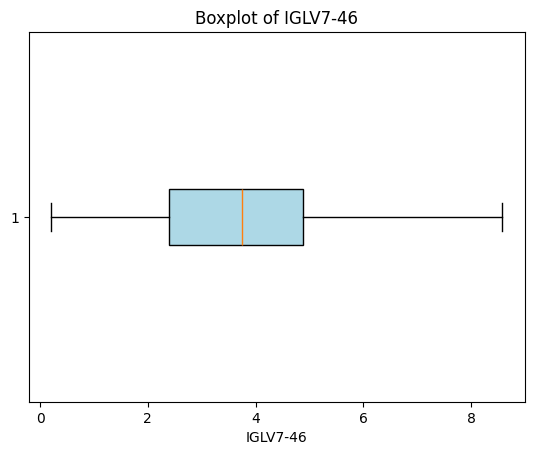

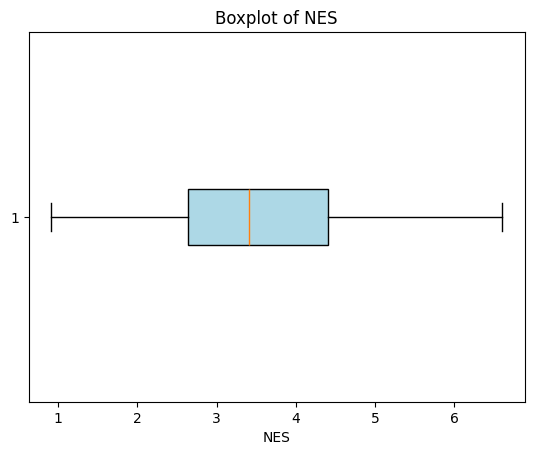

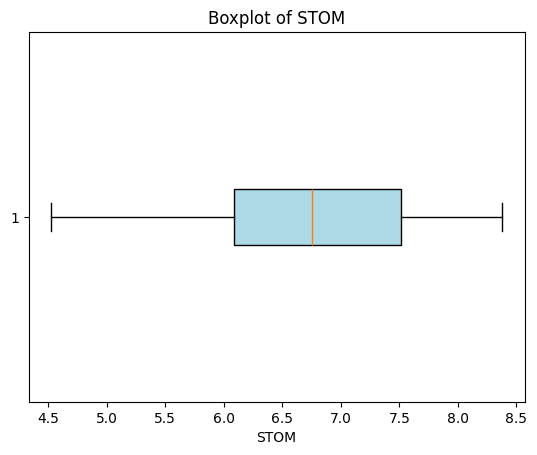

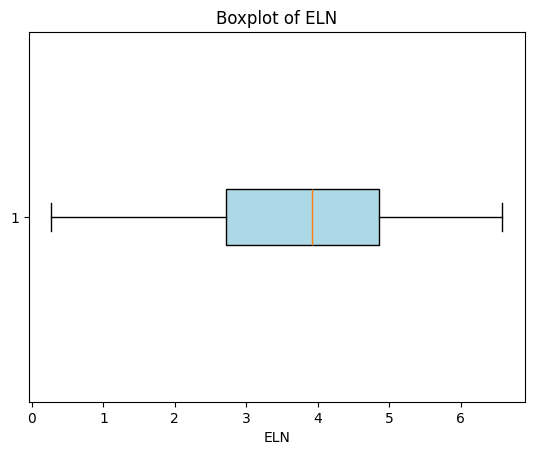

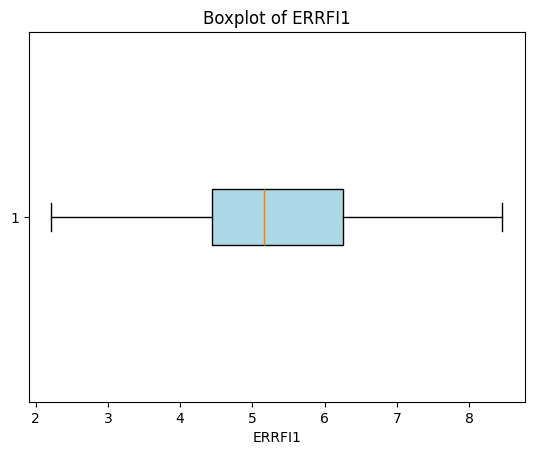

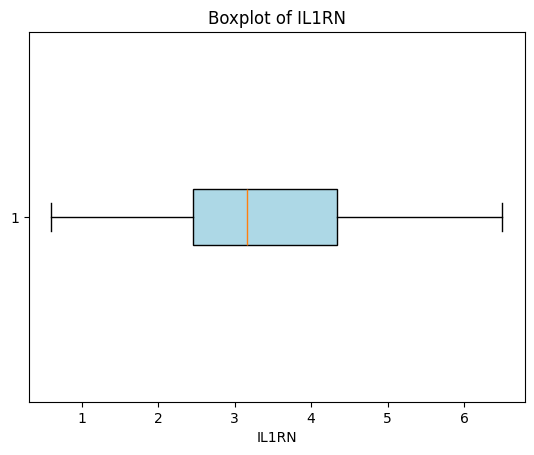

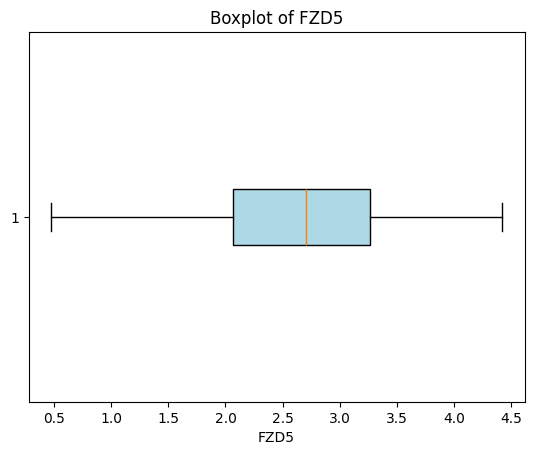

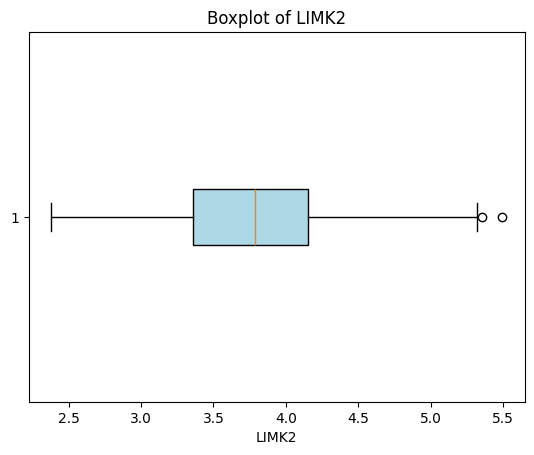

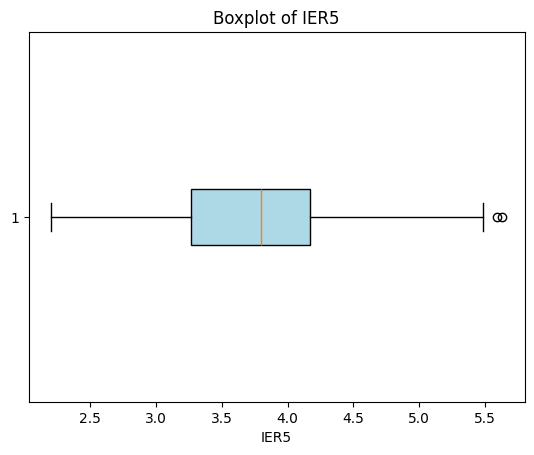

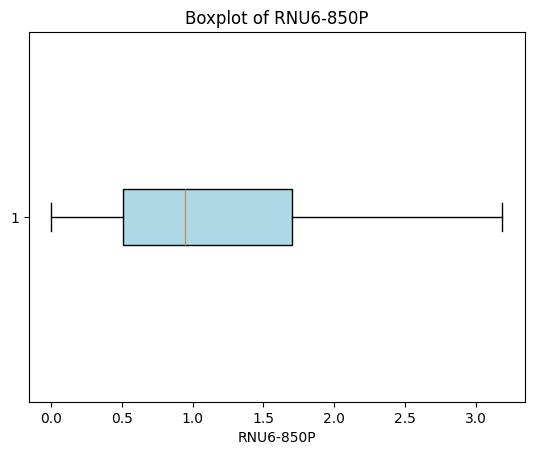

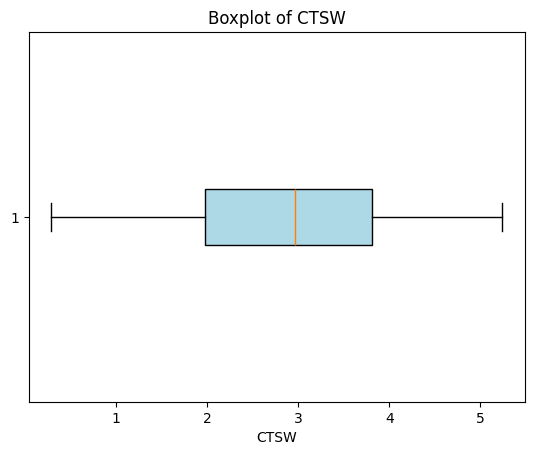

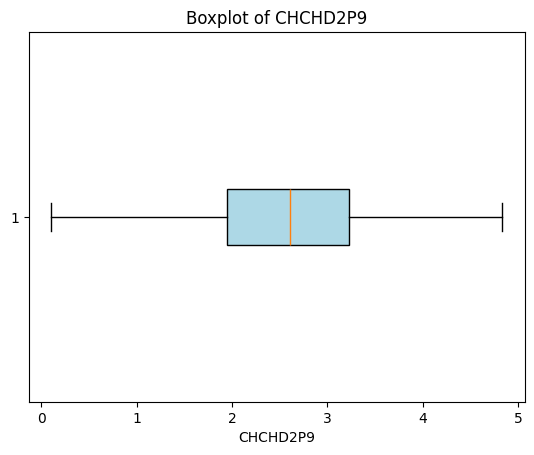

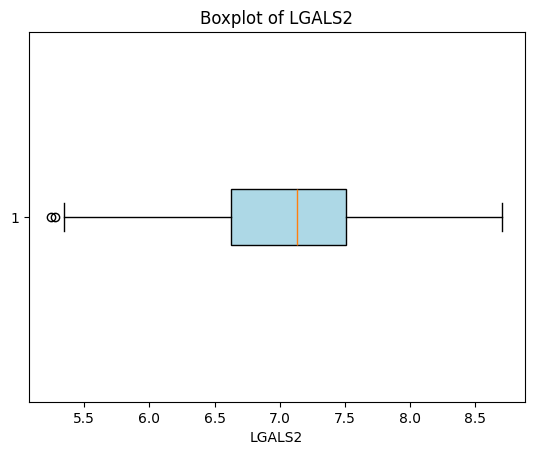

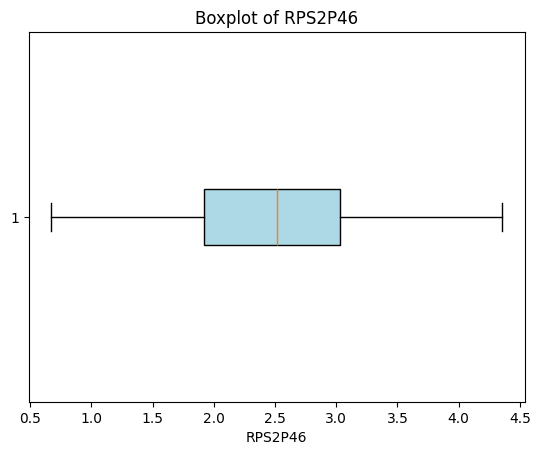

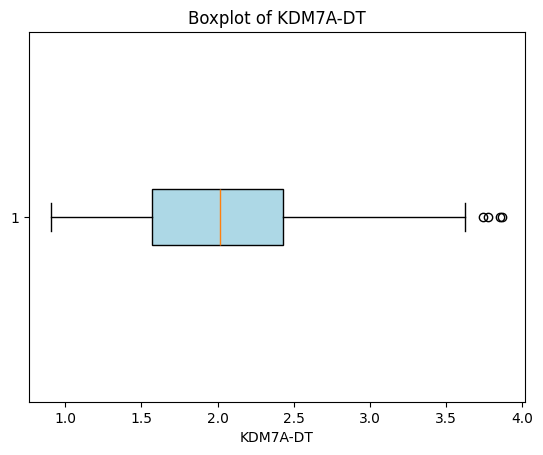

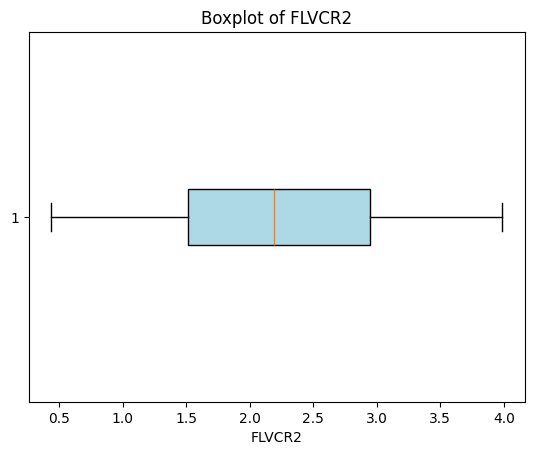

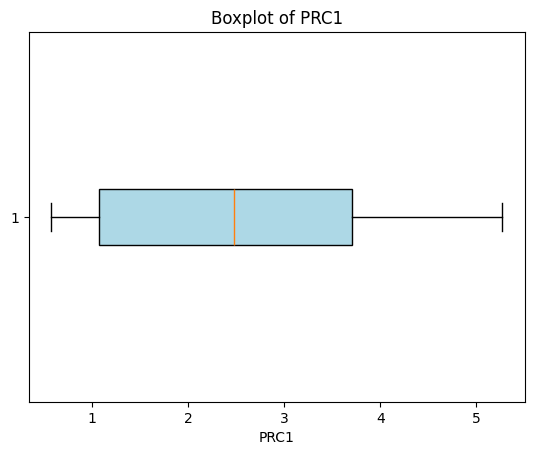

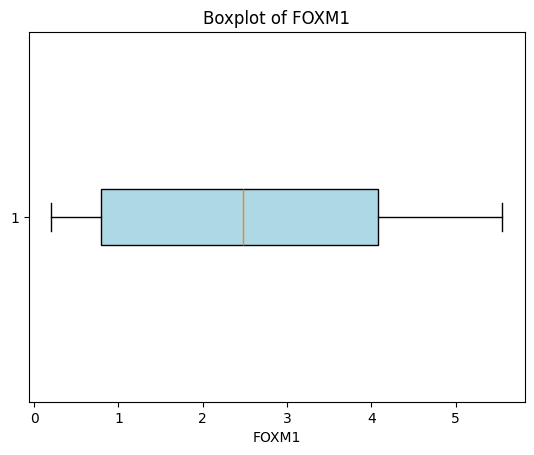

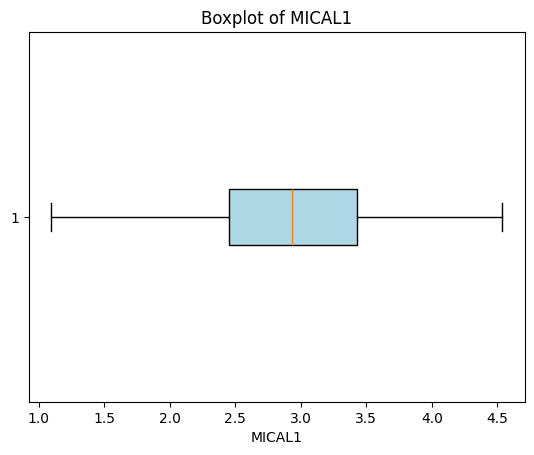

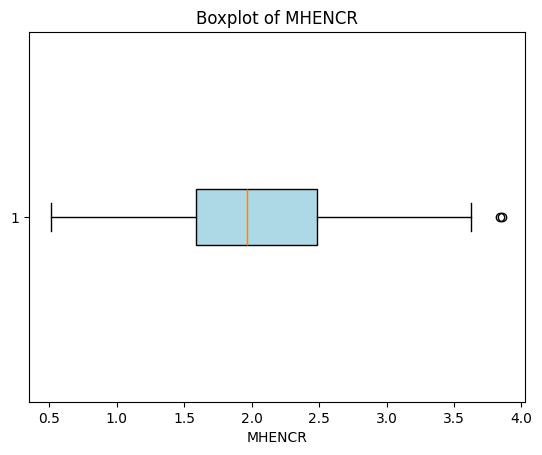

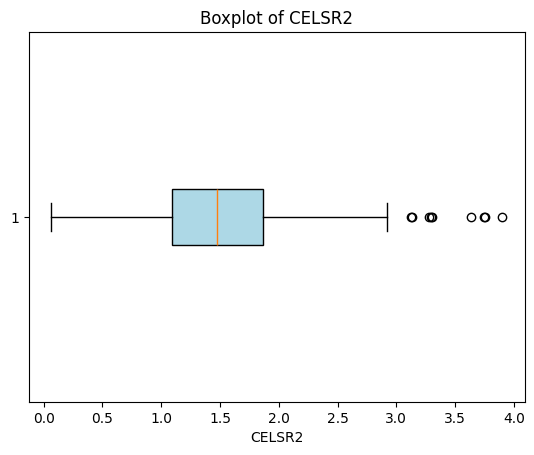

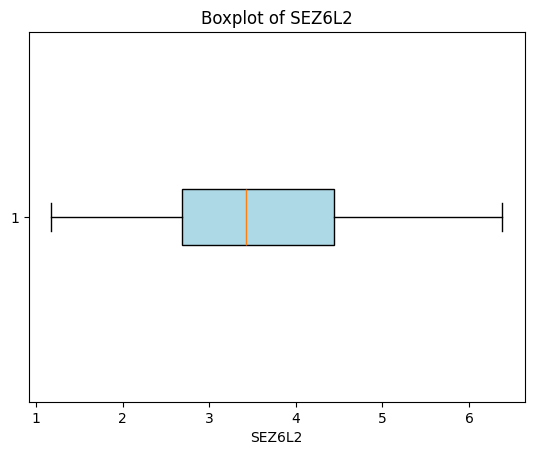

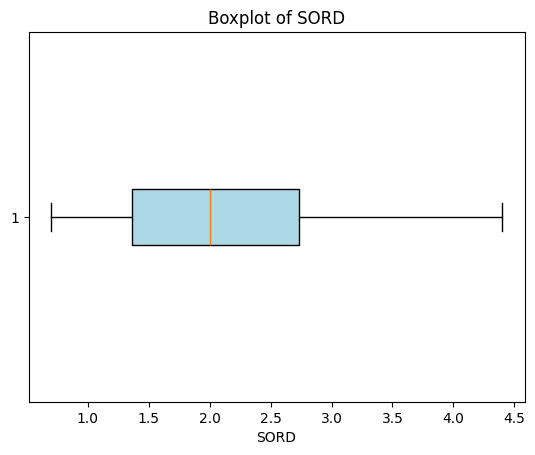

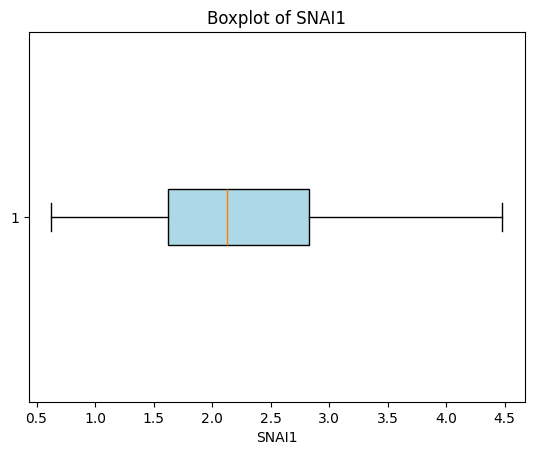

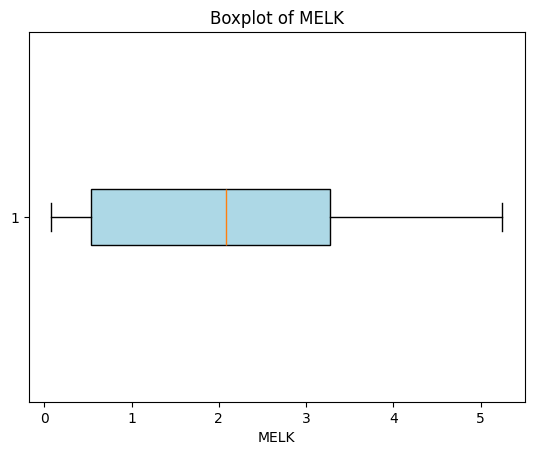

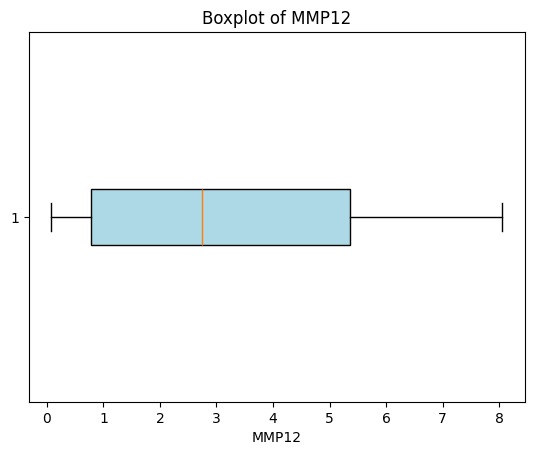

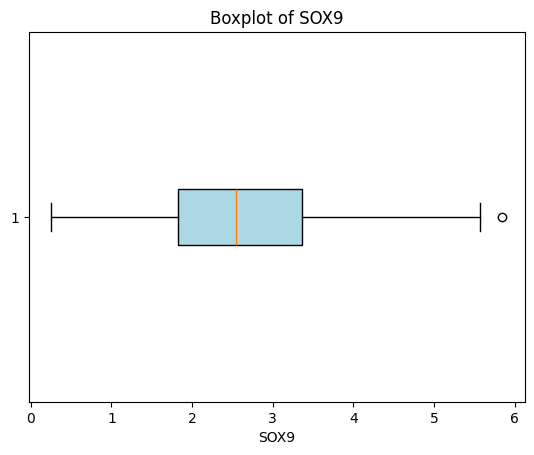

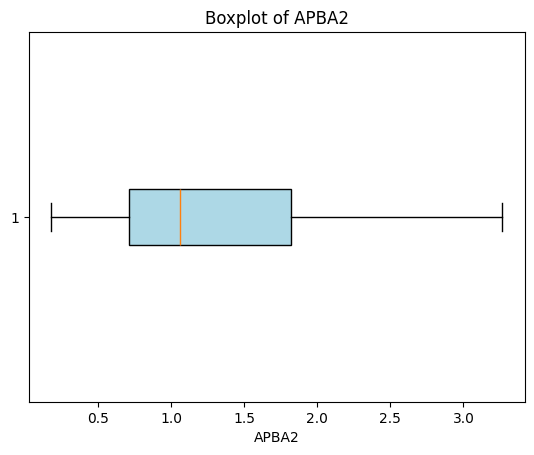

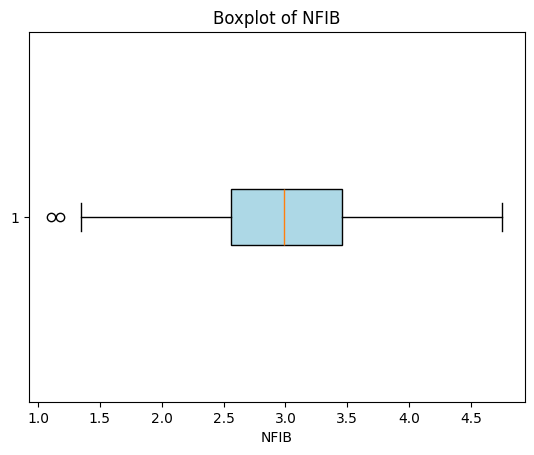

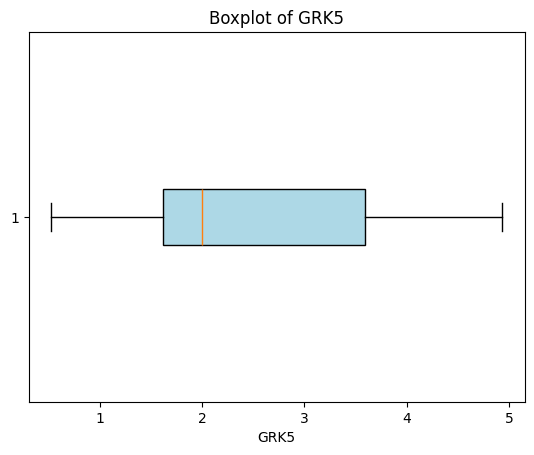

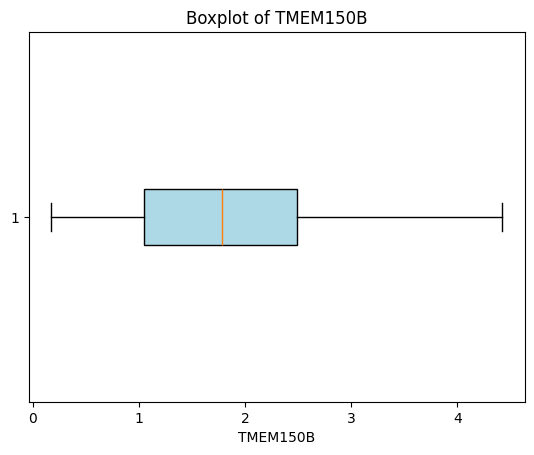

In [ ]:
import matplotlib.pyplot as plt

# Tracer un boxplot pour chaque colonne numérique
for column in data.select_dtypes(include=[np.number]).columns:
    plt.boxplot(data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()


# ***Standardisation des données:***

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib


# Create a LabelEncoder for each column separately
label_encoder_tissue = LabelEncoder()
label_encoder_source = LabelEncoder()

# Transform each column independently
data['tissue_status'] = label_encoder_tissue.fit_transform(data['tissue_status'])
data['source'] = label_encoder_source.fit_transform(data['source'])

# Save the preprocessed data to a CSV file
data.to_csv('preprocessed_data.csv', index=False)

# Save the label encoders separately so that you can reverse the encoding later
joblib.dump(label_encoder_tissue, 'label_encoder_tissue.pkl')
joblib.dump(label_encoder_source, 'label_encoder_source.pkl')

['label_encoder_source.pkl']

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler


numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Save the StandardScaler model
joblib.dump(scaler, 'scaler_model.pkl')

# Optionally, save the standardized data if needed
data.to_csv('data_with_standardized_values.csv', index=False)

# Display the first few rows of the standardized dataset
print(data.head())

          id_sample     APOC1     MERTK     CMTM3      XPR1     H2BC5  \
0  TCGA-43-6647-01A -1.825328  0.188049  0.323814  0.560360 -0.453372   
1  TCGA-22-4593-01A -2.356362 -0.035925  0.084242 -0.872818  0.016109   
2  TCGA-92-7341-01A -0.604877 -0.035925 -0.048423  1.279473  0.247004   
3  TCGA-68-8251-01A -1.766579 -0.616476  0.181734 -0.361165 -1.178613   
4  TCGA-85-8479-01A  0.058395 -0.035925  0.005172 -0.502259  1.662000   

      MSMO1    TMEM97     IFFO2    FAM89A  ...      MELK     MMP12      SOX9  \
0 -0.343978 -2.068316  0.131373 -0.646108  ...  0.032668  1.705692  1.712874   
1  1.319764  2.185634  0.131373 -0.690764  ...  1.224272 -0.178935  1.988673   
2  1.528923  1.580828  2.219967  1.228329  ...  1.175666  1.326215  0.812701   
3 -1.196633  0.453505  0.664102 -0.140921  ...  0.901427  1.540032  1.795489   
4 -0.237575 -1.693958  0.131373  0.845861  ...  0.419351 -0.537345  0.682324   

      APBA2      NFIB      GRK5  TMEM150B  tissue_status    source  class  
0  1

# ***Effectation une analyse en composantes principales (ACP) sur le dataset:***

In [ ]:
org_data=data.copy()
from sklearn.decomposition import PCA
numerical_columns = data.select_dtypes(include=['float64']).columns
pca = PCA(n_components=2)
cp = pca.fit_transform(data[numerical_columns])
data=pd.DataFrame(cp, columns=['CP1', 'CP2'])
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

# ***visualisation:***

          CP1       CP2 class
0    4.127716  1.880145   SQC
1    5.576009  1.112562   SQC
2    6.193754  3.156330   SQC
3    4.849167  0.927062   SQC
4    4.233652  1.151461   SQC
..        ...       ...   ...
145 -4.691453  1.860153   NTL
146 -4.669490  2.082768   NTL
147 -4.404220  0.108116   NTL
148 -5.298054 -0.418934   NTL
149 -4.548618  1.854890   NTL

[150 rows x 3 columns]


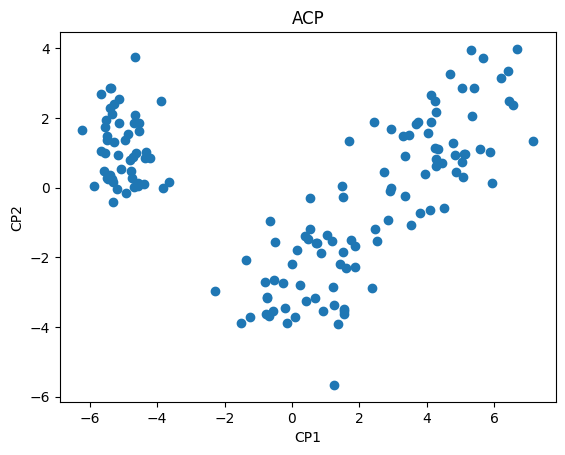

In [ ]:

if 'class' in org_data.columns:
    data['class'] = org_data['class'].reset_index(drop=True)

print (data)

plt.scatter(data['CP1'], data['CP2'])
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.title('ACP')
plt.show()

# ***Clustring:***

# ***le dendrogramme :***

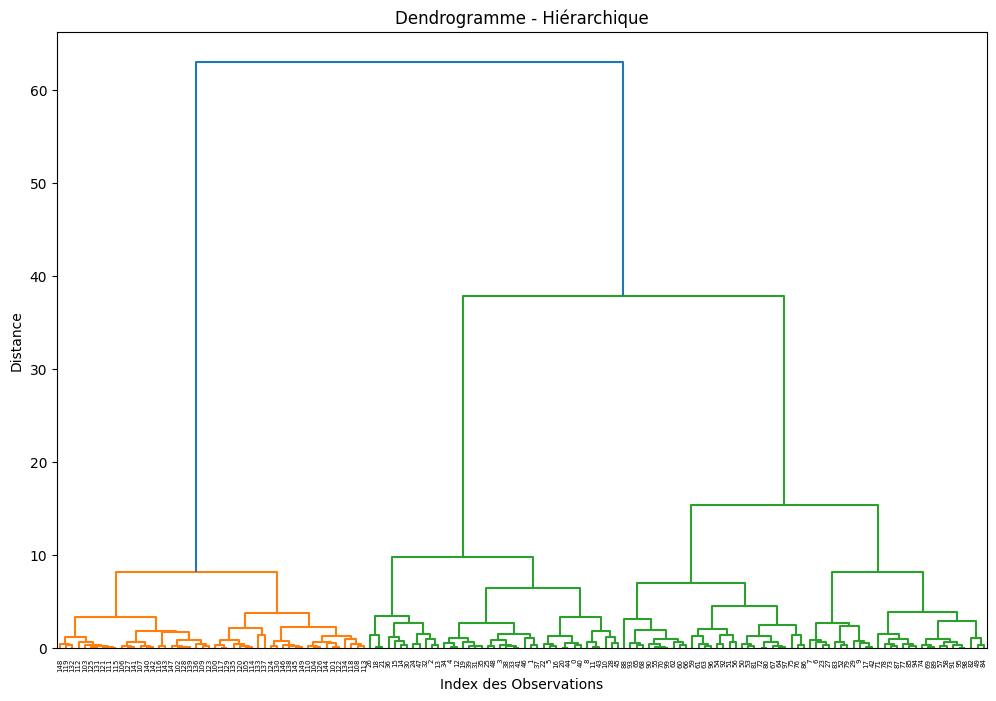

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data[['CP1','CP2']], method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title("Dendrogramme - Hiérarchique")
plt.xlabel("Index des Observations")
plt.ylabel("Distance")
plt.show()

plt.savefig("dendogram.png")

# ***Clustering hiérarchique agglomératif des données :***

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Fit the model and predict cluster labels
data['Cluster'] = model.fit_predict(data[['CP1', 'CP2']])

# Display the first few rows of the data with cluster labels

# ***visualisation:***

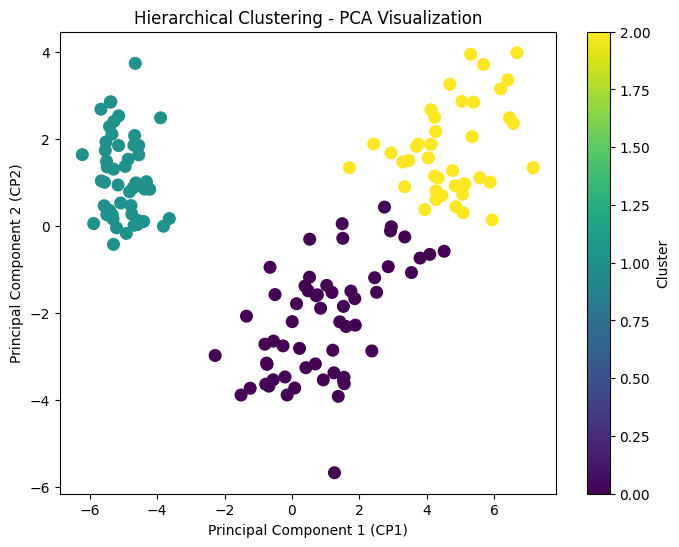

In [ ]:

import matplotlib.pyplot as plt


# Visualization of the clustering results
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(data['CP1'], data['CP2'], c=data['Cluster'], s=70, cmap='viridis')

# Add plot title and axis labels
plt.title("Hierarchical Clustering - PCA Visualization")
plt.xlabel("Principal Component 1 (CP1)")
plt.ylabel("Principal Component 2 (CP2)")

# Add a color bar for cluster identification
plt.colorbar(label="Cluster")

# Show the plot
plt.show()

# ***Sauvegarde des résultats***

In [ ]:
# import pandas as pd
# data.to_csv(r"D:\Desktop\dami.csv", index=False, sep=',')

# **Appliquer l’algorithme k-means :**

# El Bow method:

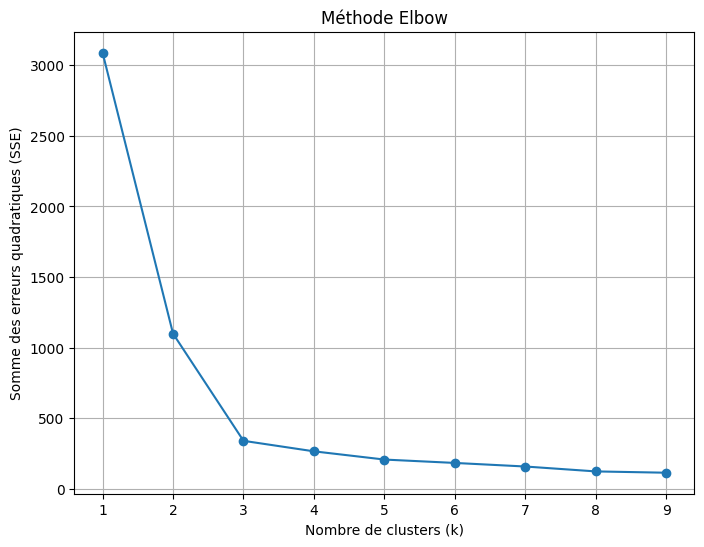

In [ ]:
from sklearn.cluster import KMeans

# Calculer le SSE pour différentes valeurs de k
sse = []
k_values = range(1, 10)  # Tester k de 1 à 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['CP1','CP2']])
    sse.append(kmeans.inertia_)

# Tracer la courbe Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker="o")
plt.title("Méthode Elbow")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Somme des erreurs quadratiques (SSE)")
plt.xticks(range(1,10))
plt.grid(True)
plt.show()

# **K-means Algorithm**

In [ ]:

from sklearn.cluster import KMeans
optimal_k = 2

# Fit KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data[['CP1', 'CP2']])  # Fit on the same two columns

# Add a new 'Cluster' column to the DataFrame
data['Cluster'] = kmeans.labels_  # Assign the cluster label to each row

# Display the updated DataFrame with the new 'Cluster' column
print(data.head())

        CP1       CP2 class  Cluster
0  4.127716  1.880145   SQC        0
1  5.576009  1.112562   SQC        0
2  6.193754  3.156330   SQC        0
3  4.849167  0.927062   SQC        0
4  4.233652  1.151461   SQC        0


# ***kmeans visualisation:***

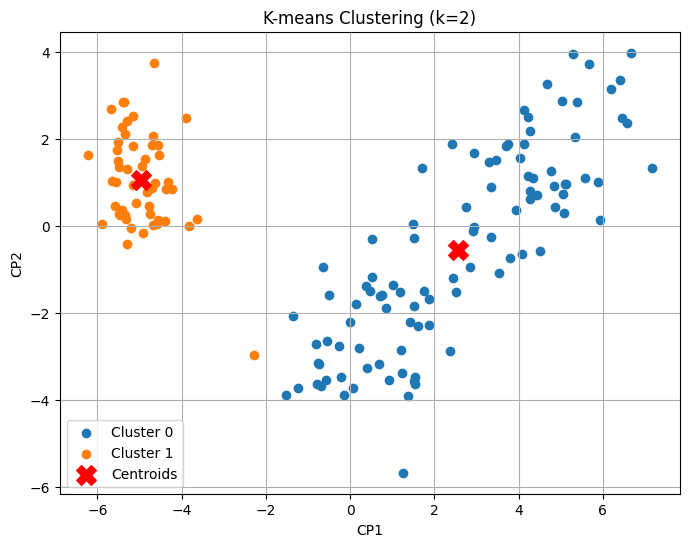

In [ ]:
import matplotlib.pyplot as plt

# Extract centroids from the KMeans model
centroids = kmeans.cluster_centers_

# Scatter plot of data points, grouped by cluster
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(cluster_points['CP1'], cluster_points['CP2'], label=f'Cluster {cluster}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Plot settings
plt.title('K-means Clustering (k=2)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.grid()
plt.show()


# **Sauvegarde des résultats**

In [ ]:
import pandas as pd
data.to_csv(r"D:\Desktop\kmeansR.csv", index=False)

#**Appliquation la validation croisée (avec k=3) sur les données du dataset:**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Initialize K-Means with k clusters (for example, 3 clusters)
n_clusters = 3
model = KMeans(n_clusters=n_clusters, random_state=42)

# Set up K-Fold Cross-Validation
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable (for evaluation)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Get predictions for each fold (clusters)
y_pred = cross_val_predict(model, X, cv=kf)

# We will use LabelEncoder to map cluster labels to the actual class labels
# Create a LabelEncoder instance for the true labels (y) and cluster labels (y_pred)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encoding true class labels
y_pred_encoded = label_encoder.fit_transform(y_pred)  # Encoding predicted cluster labels

# Calculate Accuracy, Precision, and Recall
accuracy = accuracy_score(y_encoded, y_pred_encoded)
precision = precision_score(y_encoded, y_pred_encoded, average='macro', zero_division=0)
recall = recall_score(y_encoded, y_pred_encoded, average='macro', zero_division=0)

# Print results
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Precision (Macro Average): {precision:.3f}")
print(f"Recall (Macro Average): {recall:.3f}")

Accuracy: 98.667
Precision (Macro Average): 0.987
Recall (Macro Average): 0.987


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score
import numpy as np

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Set up K-Fold Cross-Validation
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Get predictions for each fold using cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate Accuracy, Precision, and Recall
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='macro', zero_division=0)
recall = recall_score(y, y_pred, average='macro', zero_division=0)

# Print results
print(f"Accuracy: {accuracy*100:.3f}")
print(f"Precision (Macro Average): {precision:.3f}")
print(f"Recall (Macro Average): {recall:.3f}")


Accuracy: 97.333
Precision (Macro Average): 0.973
Recall (Macro Average): 0.973









**The code evaluates a Decision Tree Classifier using 3-fold Cross-Validation to ensure fair performance assessment. It trains the model on different subsets of the data and tests on unseen folds, generating predictions for all samples. Finally, it calculates and displays accuracy, precision, and recall, providing insights into the classifier's effectiveness.**

# ***classification***

# **KNN (pour k= 3, 4 et 5):**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Séparer les caractéristiques et la cible
X = data.drop(columns=['class', 'Cluster']) # Remplacez 'Target' par votre colonne cible
y = data['class']
results_knn = []
# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for k in [3, 4, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Entraîner le modèle
    y_predict = knn.predict(X_test)  # Faire des prédictions sur l'ensemble de test
    precision = precision_score(y_test, y_predict, average='micro')

    recall = recall_score(y_test, y_predict, average='micro')

    f1 = f1_score(y_test, y_predict, average='micro')

    accuracy = accuracy_score(y_test, y_predict)

 # Ajouter les résultats
    results_knn.append({'Model': f'KNN (k={k})', 'Accuracy': accuracy*100,
                        'Precision': precision, 'Recall': recall, 'F1-Score': f1})

    results_knn_df = pd.DataFrame(results_knn)

print(results_knn_df)

       Model  Accuracy  Precision  Recall  F1-Score
0  KNN (k=3)     100.0        1.0     1.0       1.0
1  KNN (k=4)     100.0        1.0     1.0       1.0
2  KNN (k=5)     100.0        1.0     1.0       1.0


# **Les arbres de décision:**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_predict = decision_tree.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='micro')
recall = recall_score(y_test, y_predict, average='micro')
f1 = f1_score(y_test, y_predict, average='micro')

# Save results in a DataFrame
results_dt = pd.DataFrame([{
    'Model': 'Decision Tree',
    'Accuracy': accuracy*100,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}])

print(results_dt)




           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree     100.0        1.0     1.0       1.0


# **La visualisation d'arbres de décision:**

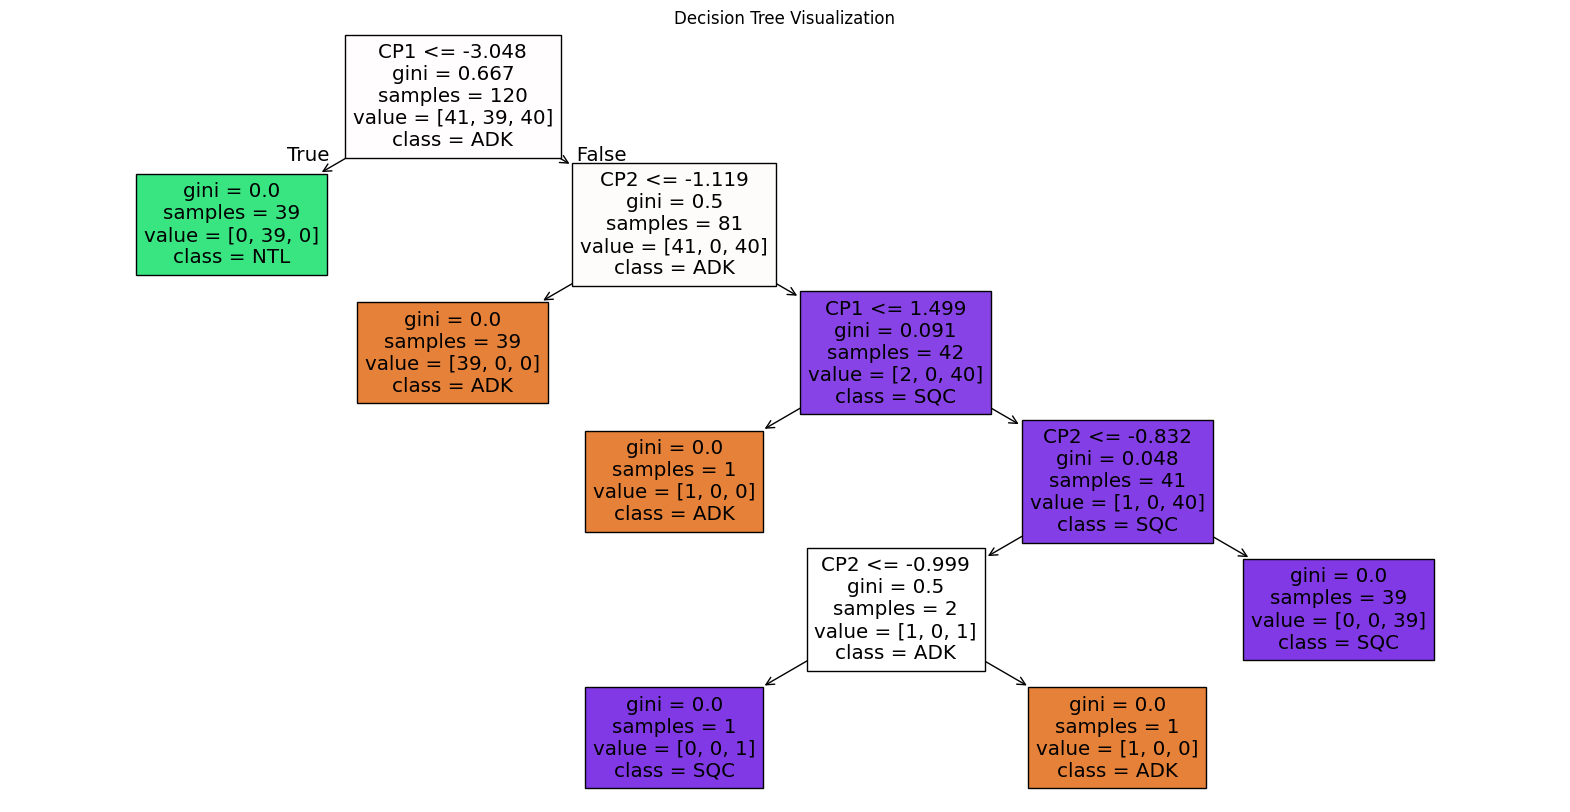

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=decision_tree.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# **Le Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialiser et entraîner le modèle Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_predict = naive_bayes.predict(X_test)  # Faire des prédictions

# Calculer les métriques
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='micro')
recall = recall_score(y_test, y_predict, average='micro')
f1 = f1_score(y_test, y_predict, average='micro')

# Sauvegarder les résultats dans un tableau
results_nb = pd.DataFrame([{
    'Model': 'Naive Bayes',
    'Accuracy': accuracy*100,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}])
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')
print(results_nb)


         Model  Accuracy  Precision  Recall  F1-Score
0  Naive Bayes     100.0        1.0     1.0       1.0


# **Sauvegarde des résultats**

In [ ]:
results_nb.to_csv(r"D:\Desktop\classificationR.csv", index=False)
results_dt.to_csv(r"D:\Desktop\classificationR.csv", index=False,mode='a')
results_knn_df.to_csv(r"D:\Desktop\classificationR.csv", index=False, mode='a')

#  **visiulisation**

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import pandas as pd
import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the saved models
naive_bayes_model = joblib.load('naive_bayes_model.pkl')
scaler = joblib.load('scaler_model.pkl')
pca = joblib.load('pca_model.pkl')
label_encoder_tissue = joblib.load('label_encoder_tissue.pkl')
label_encoder_source = joblib.load('label_encoder_source.pkl')

# Define the function to process the uploaded file and make predictions
def upload_file(file):
    if file is not None:
        try:
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file)

            # Strip leading/trailing spaces from column names
            df.columns = df.columns.str.strip()

            # Validate that there are at least 50 features + categorical columns
            if len(df.columns) < 52:
                return "Error: The uploaded file must have at least 50 features, plus 'tissue_status' and 'source' columns."

            # Encode categorical columns
            if 'tissue_status' in df.columns:
                df['tissue_status'] = label_encoder_tissue.transform(df['tissue_status'])
            else:
                return "Error: Missing 'tissue_status' column."

            if 'source' in df.columns:
                df['source'] = label_encoder_source.transform(df['source'])
            else:
                return "Error: Missing 'source' column."

            # Standardize the features using the scaler
            numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
            df[numerical_columns] = scaler.transform(df[numerical_columns])

            # Apply PCA transformation to reduce to CP1 and CP2
            cp = pca.transform(df)

            # Create a DataFrame for PCA components
            pca_df = pd.DataFrame(cp, columns=['CP1', 'CP2'])

            # Predict using the Naive Bayes model
            predictions = naive_bayes_model.predict(pca_df)

            # Map predictions to classes and return the result
            return f"🎉 The predicted classes are: {', '.join(map(str, predictions))}."
        except Exception as e:
            return f"❌ Error processing the file: {str(e)}"
    else:
        return "⚠️ No file uploaded. Please upload a valid CSV file."
# Enhanced CSS styling with enforced white backgrounds
custom_css = """
.gradio-container {
    background: linear-gradient(135deg, #89CFF0, #B0E0E6);
    border-radius: 15px;
    padding: 30px;
    font-family: 'Arial', sans-serif;
    color: #1e3a8a;
}
.gradio-title {
    font-size: 36px;
    font-weight: bold;
    color: #000080;
    margin-bottom: 10px;
    text-align: center; /* Center the title */
}
.gradio-description {
    padding: 30px;
    font-size: 20px;
    color: #00008B;
    margin: 0 auto; /* Center horizontally */
    text-align: center; /* Center the text */
    width: 80%; /* Optional: Adjust width for better centering */
}

button:hover {
    background-color: #4682B4 !important;
}
input[type="file"] {
    background-color: #ffffff !important;
    color: #000000 !important;
    border-radius: 10px !important;
    padding: 10px !important;
    border: 2px solid #B0E0E6 !important;
    font-size: 16px !important;
    cursor: pointer !important;
}
textarea {
    background-color: #ffffff !important;
    color: #000000 !important;
    border: 2px solid #B0E0E6 !important;
    border-radius: 10px !important;
    font-size: 16px !important;
    padding: 15px !important;
    min-height: 100px !important;
    white-space: pre-wrap !important;
}
"""


# Create Gradio interface
interface = gr.Interface(
    fn=upload_file,
    inputs=gr.File(label="📁 Upload your CSV file"),
    outputs=gr.Textbox(label="📊 Prediction Results"),
    title="🌟 Lung Cancer Prediction System",
    description=(
        "📂 Upload a CSV file with 50 genes, "
        "'tissue_status', and 'source'🧬.\n"
        "🩺 Predict lung cancer types with ease!"
    ),
    theme="default",
    allow_flagging="never",
    css=custom_css
)

# Launch the interface
interface.launch()



/usr/local/lib/python3.10/dist-packages/gradio/interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://93d9941da009d7c283.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
